In [1]:
################################################################################################################################
#
# ECONOMETRIC - ROLLING - LN - MONTHLY
#
################################################################################################################################

#-------------------------------------------------------------------------------------------------------------------------------
#    Price           MSE   RMSE
#---------------------------------
# 0  Last     43,832,846  6,621
# 1  Mean  3,470,811,963 58,914
# 2  MA       42,313,143  6,505
# 3  AR       42,768,145  6,540
# 4  ARMA     40,083,807  6,331
# 5  ARIMA             0      0
# 6  ARIMAR   42,619,672  6,528
# 7  SARIMAR  43,821,584  6,620
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# ENVIRONMENT: LIBRARIES
#===============================================================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pmdarima as pmd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
################################################################################################################################
# DATA
################################################################################################################################

#===============================================================================================================================
# DATA INPUT: PRICES
#===============================================================================================================================
seriesId='IBOV-monthly'
df = pd.read_csv('Data/Input/'+seriesId+'.csv')
#df.drop(['Open','Low','High', 'Qt'], axis='columns', inplace=True )
PERIOD=249
df

,Date,Close
0,28/01/2000,16734.39
1,29/02/2000,17660.20
2,31/03/2000,17820.37
3,28/04/2000,15537.60
4,31/05/2000,14956.61
...,...,...
283,31/08/2023,115741.81
284,29/09/2023,116565.17
285,31/10/2023,113143.67
286,30/11/2023,127331.12


In [3]:
#===============================================================================================================================
# DATA INPUT: PRICES - DATETIME
#===============================================================================================================================
df['Date'] =pd.to_datetime(df['Date'], dayfirst=True)
df

,Date,Close
0,2000-01-28,16734.39
1,2000-02-29,17660.20
2,2000-03-31,17820.37
3,2000-04-28,15537.60
4,2000-05-31,14956.61
...,...,...
283,2023-08-31,115741.81
284,2023-09-29,116565.17
285,2023-10-31,113143.67
286,2023-11-30,127331.12


In [4]:
#===============================================================================================================================
# DATA INPUT: PRICES - SET INDEX
#===============================================================================================================================
df2 = df.set_index('Date')
df2

,Close
Date,
2000-01-28,16734.39
2000-02-29,17660.20
2000-03-31,17820.37
2000-04-28,15537.60
2000-05-31,14956.61
...,...
2023-08-31,115741.81
2023-09-29,116565.17
2023-10-31,113143.67


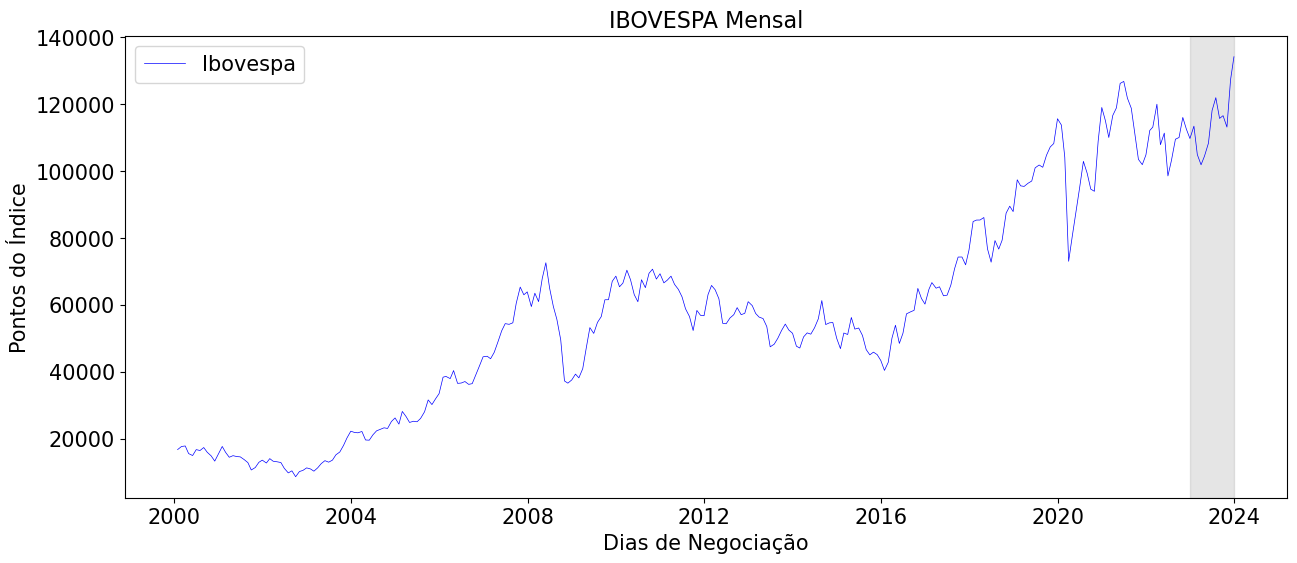

In [5]:
#===============================================================================================================================
# DATA INPUT: PRICES - PLOT
#===============================================================================================================================
plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['Close'], label = 'Ibovespa', color='b', linewidth=0.5)
plt.title('IBOVESPA Mensal', fontsize=16)
plt.xlabel('Dias de Negociação', fontsize=15)
plt.ylabel('Pontos do Índice', fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.axvspan('2023', '2024', color='#808080', alpha=0.2)
plt.legend(loc=2, prop={'size': 15}, bbox_to_anchor=(0,1))
plt.show()


In [6]:
#===============================================================================================================================
# DATA PREP: LOG
#===============================================================================================================================
dfln = df.copy()
dfln['CloseLn']= np.log(dfln['Close'])
dfln

,Date,Close,CloseLn
0,2000-01-28,16734.39,9.725221
1,2000-02-29,17660.20,9.779069
2,2000-03-31,17820.37,9.788097
3,2000-04-28,15537.60,9.651018
4,2000-05-31,14956.61,9.612909
...,...,...,...
283,2023-08-31,115741.81,11.659117
284,2023-09-29,116565.17,11.666206
285,2023-10-31,113143.67,11.636414
286,2023-11-30,127331.12,11.754546


In [7]:
#===============================================================================================================================
# DATA PREP: LOG - SET INDEX
#===============================================================================================================================
dfln2 = dfln.set_index('Date')
dfln2

,Close,CloseLn
Date,,
2000-01-28,16734.39,9.725221
2000-02-29,17660.20,9.779069
2000-03-31,17820.37,9.788097
2000-04-28,15537.60,9.651018
2000-05-31,14956.61,9.612909
...,...,...
2023-08-31,115741.81,11.659117
2023-09-29,116565.17,11.666206
2023-10-31,113143.67,11.636414


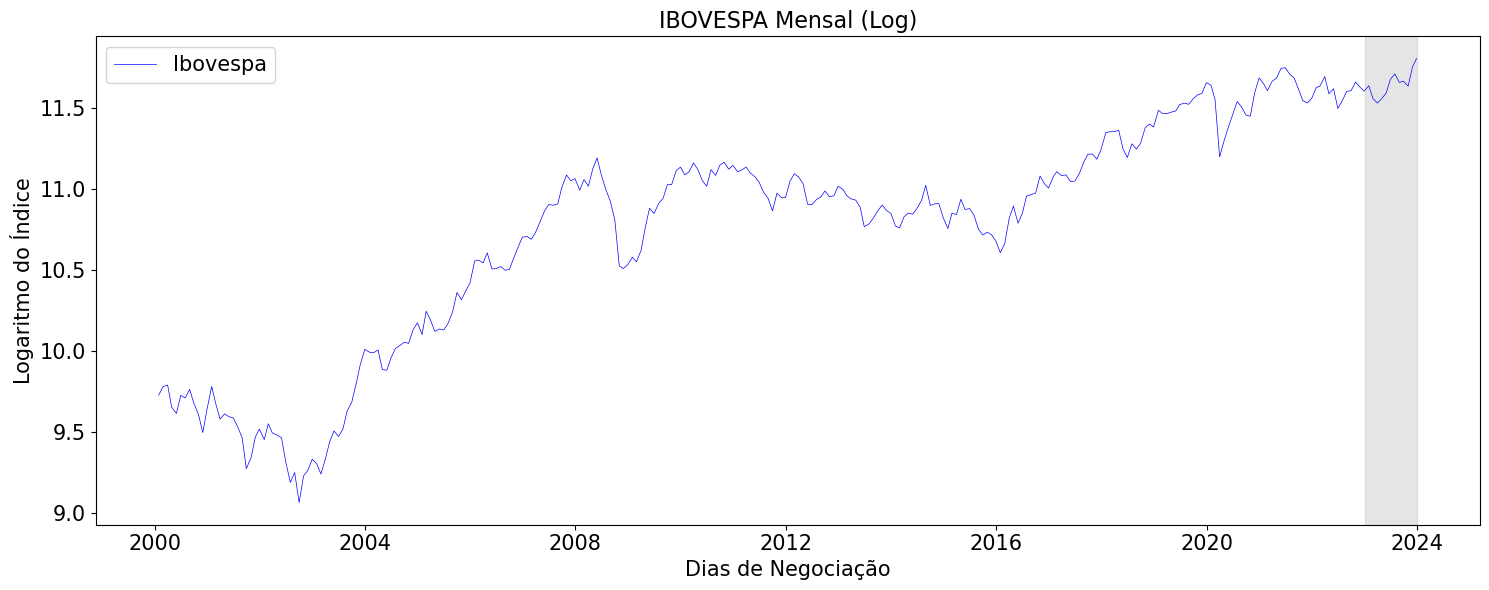

In [8]:
#===============================================================================================================================
# DATA PREP: LOG - PLOT
#===============================================================================================================================
plt.figure(figsize=(15,6))
plt.plot(dfln['Date'], dfln['CloseLn'], 'b-', label = "Ibovespa", linewidth=0.5)
plt.title('IBOVESPA Mensal (Log)', fontsize=16)
plt.xlabel('Dias de Negociação', fontsize=15)
plt.ylabel('Logaritmo do Índice', fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.axvspan('2023', '2024', color='#808080', alpha=0.2)
plt.legend(loc=2, prop={'size': 15}, bbox_to_anchor=(0,1))
plt.tight_layout()
plt.show()


In [9]:
#===============================================================================================================================
# DATA PREP: LOG-DIFF
#===============================================================================================================================
dfln['CloseLnDiff'] = 0
dfln.loc[1:, ['CloseLnDiff']] = dfln.loc[:, 'CloseLn'].diff()
dfln

,Date,Close,CloseLn,CloseLnDiff
0,2000-01-28,16734.39,9.725221,0.000000
1,2000-02-29,17660.20,9.779069,0.053848
2,2000-03-31,17820.37,9.788097,0.009029
3,2000-04-28,15537.60,9.651018,-0.137079
4,2000-05-31,14956.61,9.612909,-0.038110
...,...,...,...,...
283,2023-08-31,115741.81,11.659117,-0.052192
284,2023-09-29,116565.17,11.666206,0.007089
285,2023-10-31,113143.67,11.636414,-0.029792
286,2023-11-30,127331.12,11.754546,0.118133


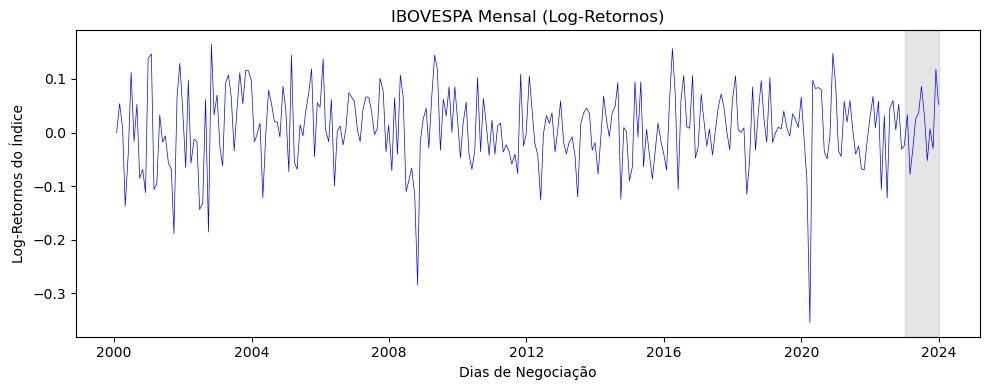

In [10]:
#===============================================================================================================================
# DATA PREP: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('IBOVESPA Mensal (Log-Retornos)', fontsize=12)
ax.plot(dfln['Date'], dfln['CloseLnDiff'], 'b-', label = "Ibovespa", linewidth=0.5)
ax.set_xlabel('Dias de Negociação')
ax.set_ylabel('Log-Retornos do Índice')
ax.axvspan('2023', '2024', color='#808080', alpha=0.2)
plt.tight_layout()

In [11]:
#===============================================================================================================================
# DATA PREP: SPLIT
#===============================================================================================================================
totallen = len(df)
trainlen = len(df2[:'2022'])
testlen  = len(df2['2023':])

trainfin = trainlen-1
testini  = trainlen

train = df[:testini]
test  = df[testini:]

print("Train Len", trainlen, "Length Total =", totallen, "| Train Fin =", trainfin, "| Test Ini =", testini)
#-------------------------------------------------------------------------------------------------------------------------------
# Train Len 276 Length Total = 288 | Train Fin = 275 | Test Ini = 276
#-------------------------------------------------------------------------------------------------------------------------------
train

Train Len 276 Length Total = 288 | Train Fin = 275 | Test Ini = 276


,Date,Close
0,2000-01-28,16734.39
1,2000-02-29,17660.20
2,2000-03-31,17820.37
3,2000-04-28,15537.60
4,2000-05-31,14956.61
...,...,...
271,2022-08-31,109522.88
272,2022-09-30,110036.79
273,2022-10-31,116037.08
274,2022-11-30,112486.01


In [12]:
################################################################################################################################
# ROLLING FORECAST
################################################################################################################################
from statsmodels.tsa.statespace.sarimax import SARIMAX

#===============================================================================================================================
# ROLLING FORECAST: PARAMETERS
#===============================================================================================================================
HORIZON = len(test)
WINDOW = 1

#===============================================================================================================================
# ROLLING FORECAST: FUNCTION
#===============================================================================================================================
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str, orderparam=(0,0,0)) -> list:   
    
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean
    elif method == 'last':
        pred_last = []
        
        for i in range(train_len, total_len, window):
            last = df.loc[i]
            pred_last.extend(last for _ in range(window))
        return pred_last
    elif method == 'MA':
        pred_MA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
        
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("θ1 = {}, θ2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_MA
    elif method == 'AR':
        pred_AR = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)
            
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("phi1 = {}, phi2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_AR
    elif method == 'ARMA':
        pred_ARMA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)  
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)
            
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("θ = {}, σ2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_ARMA

In [13]:
################################################################################################################################
# BASELINES
################################################################################################################################

#===============================================================================================================================
# BASELINES: LOG - FORECAST - last, mean
#===============================================================================================================================
pred_LastLn = rolling_forecast(dfln['CloseLn'], trainfin, HORIZON, WINDOW, 'last')
pred_MeanLn = rolling_forecast(dfln['CloseLn'], trainfin+1, HORIZON, WINDOW, 'mean')

#===============================================================================================================================
# BASELINES: LOG - COPY testln - last, mean 
#===============================================================================================================================
testln = dfln.loc[trainfin:,['Date','CloseLn']]
testln.loc[testini:,'pred_LastLn'] = pred_LastLn
testln.loc[testini:,'pred_MeanLn'] = pred_MeanLn

testln

,Date,CloseLn,pred_LastLn,pred_MeanLn
275,2022-12-29,11.605820,NaN,NaN
276,2023-01-31,11.638946,11.605820,10.732902
277,2023-02-28,11.561067,11.638946,10.736173
278,2023-03-31,11.531573,11.561067,10.739140
279,2023-04-28,11.556288,11.531573,10.741981
280,2023-05-31,11.592984,11.556288,10.744889
281,2023-06-30,11.679177,11.592984,10.747907
282,2023-07-31,11.711309,11.679177,10.751209
283,2023-08-31,11.659117,11.711309,10.754602
284,2023-09-29,11.666206,11.659117,10.757787


In [14]:
#===============================================================================================================================
# BASELINES: LOG - COPY dfln - last, mean 
#===============================================================================================================================
dfln['pred_LastLn'] = 0.0
dfln['pred_MeanLn'] = 0.0

dfln.loc[testini:,'pred_LastLn']=testln.loc[testini:,'pred_LastLn']
dfln.loc[testini:,'pred_MeanLn']=testln.loc[testini:,'pred_MeanLn']

dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn
275,2022-12-29,109734.60,11.605820,-0.024764,0.000000,0.000000
276,2023-01-31,113430.54,11.638946,0.033126,11.605820,10.732902
277,2023-02-28,104931.93,11.561067,-0.077879,11.638946,10.736173
278,2023-03-31,101882.20,11.531573,-0.029495,11.561067,10.739140
279,2023-04-28,104431.63,11.556288,0.024715,11.531573,10.741981
280,2023-05-31,108335.07,11.592984,0.036696,11.556288,10.744889
281,2023-06-30,118087.00,11.679177,0.086193,11.592984,10.747907
282,2023-07-31,121942.98,11.711309,0.032132,11.679177,10.751209
283,2023-08-31,115741.81,11.659117,-0.052192,11.711309,10.754602
284,2023-09-29,116565.17,11.666206,0.007089,11.659117,10.757787


In [15]:
#===============================================================================================================================
# BASELINES: LOG - PERFORMANCE - last, mean
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,4))  , "{:,}".format(round(sqrt(mse_Last),4))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,4))  , "{:,}".format(round(sqrt(mse_Mean),4))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Log      MSE    RMSE
#------------------------
# 0 Last  0.0032  0.0569
# 1 Mean  0.8143  0.9024
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.0032,0.0569
1,Mean,0.8143,0.9024


Text(0, 0.5, 'Log')

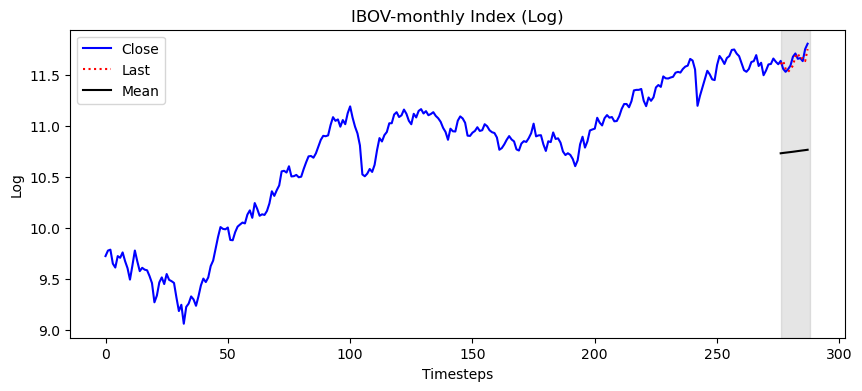

In [16]:
#===============================================================================================================================
# BASELINES: LOG - PLOT - close, last, mean
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Log)', fontsize=12)
ax3.plot(dfln['CloseLn'], 'b-', label='Close')
ax3.plot(dfln.loc[testini:,'pred_LastLn'], 'r:', label='Last')
ax3.plot(dfln.loc[testini:,'pred_MeanLn'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Log')

Text(0, 0.5, 'Log')

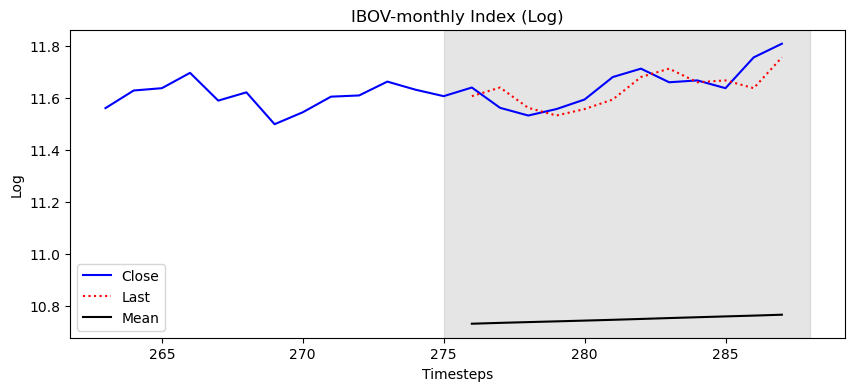

In [17]:
#===============================================================================================================================
# BASELINES: LOG - Plot (zoom) - close, last, mean
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Log)', fontsize=12)
ax3.plot(dfln.loc[trainfin-testlen:,'CloseLn'    ], 'b-', label='Close')
ax3.plot(dfln.loc[testini:  ,'pred_LastLn'], 'r:', label='Last')
ax3.plot(dfln.loc[testini:  ,'pred_MeanLn'], 'k-', label='Mean')
ax3.axvspan(trainfin, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=3)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Log')


In [18]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER
#===============================================================================================================================
df['pred_Last'] = 0.0
df['pred_Mean'] = 0.0


pred_Last = rolling_forecast(dfln['Close'], trainfin, HORIZON, WINDOW, 'last')
pred_Mean = rolling_forecast(dfln['Close'], trainfin+1, HORIZON, WINDOW, 'mean')

df.loc[testini:,'pred_Last']= pred_Last
df.loc[testini:,'pred_Mean']= np.round(pred_Mean,2)


df[testini-1:]

,Date,Close,pred_Last,pred_Mean
275,2022-12-29,109734.60,0.00,0.00
276,2023-01-31,113430.54,109734.60,55666.44
277,2023-02-28,104931.93,113430.54,55874.98
278,2023-03-31,101882.20,104931.93,56051.44
279,2023-04-28,104431.63,101882.20,56215.71
280,2023-05-31,108335.07,104431.63,56387.91
281,2023-06-30,118087.00,108335.07,56572.78
282,2023-07-31,121942.98,118087.00,56790.91
283,2023-08-31,115741.81,121942.98,57021.13
284,2023-09-29,116565.17,115741.81,57227.89


In [19]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last),))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean),))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Price           MSE    RMSE
#------------------------------
# 0 Last     43,832,846   6,621
# 1 Mean  3,470,811,963  58,914
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,"43,832,846","6,621"
1,Mean,"3,470,811,963","58,914"


Text(0, 0.5, 'Prices')

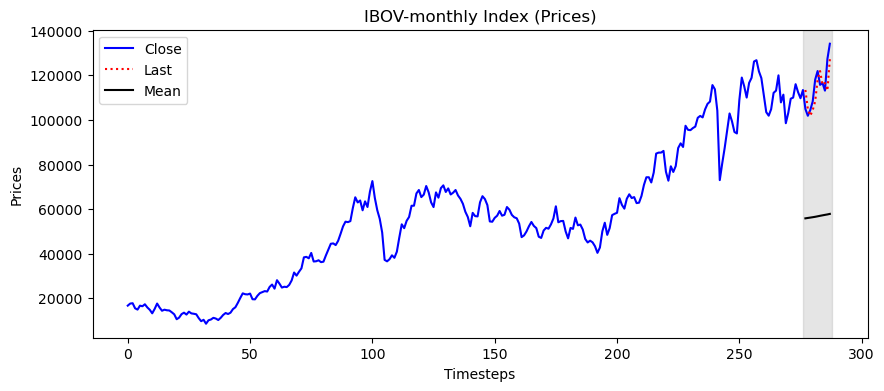

In [20]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PLOT
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Prices)', fontsize=12)
ax3.plot(df['Close'], 'b-', label='Close')
ax3.plot(df.loc[testini+1:,'pred_Last'], 'r:', label='Last')
ax3.plot(df.loc[testini+1:,'pred_Mean'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Prices')

Text(0, 0.5, 'Prices')

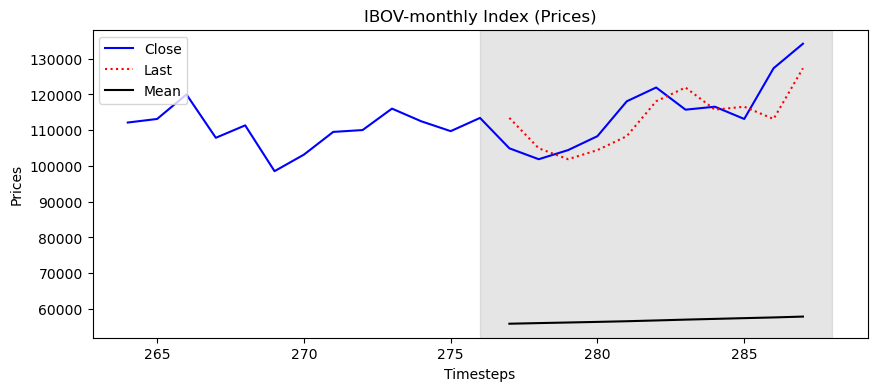

In [21]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PLOT (zoom)
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Prices)', fontsize=12)
ax3.plot(df.loc[testini-testlen:,'Close'    ], 'b-', label='Close')
ax3.plot(df.loc[testini+1:  ,'pred_Last'], 'r:', label='Last')
ax3.plot(df.loc[testini+1:  ,'pred_Mean'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Prices')

In [22]:
################################################################################################################################
# STATIONARITY
################################################################################################################################

#===============================================================================================================================
# STATIONARITY: LOG - ADF test
#===============================================================================================================================
ADF_Close = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ADF_Close[0],3)}')
print(f'ADF p-value  : {np.round(ADF_Close[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -0.922
# ADF p-value  : 0.78
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON-STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -0.922
ADF p-value  : 0.78


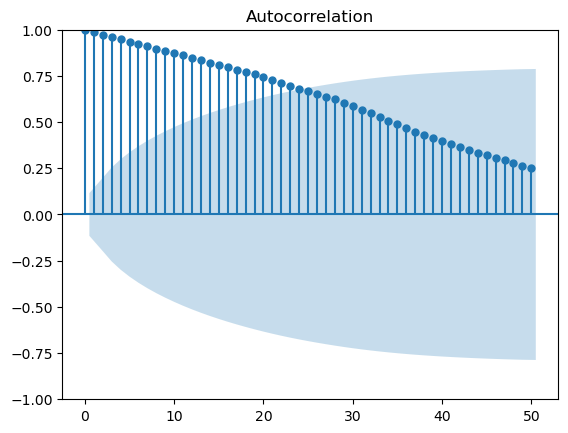

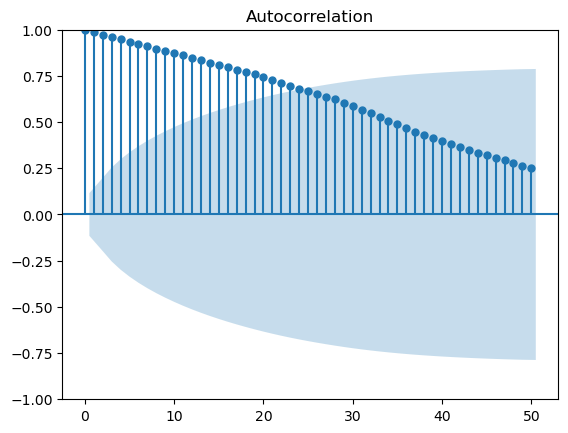

In [23]:
#===============================================================================================================================
# STATIONARITY: LOG - ACF plot
#===============================================================================================================================
plot_acf(dfln['CloseLn'], lags=50)

#-------------------------------------------------------------------------------------------------------------------------------
# Significant AC coefficients slowly decreasing after lag 0 
#-------------------------------------------------------------------------------------------------------------------------------
# ***** AUTOCORRELATION present ******
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# DATA STATIONARITY: LOG - ADF test + ACF plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NO RANDOM-WALK *****
#-------------------------------------------------------------------------------------------------------------------------------

In [24]:
#===============================================================================================================================
# STATIONARITY: LOG-DIFF - ADF test
#===============================================================================================================================
ADF_Close = adfuller(dfln['CloseLnDiff'])
print(f'ADF Statistic: {np.round(ADF_Close[0],3)}')
print(f'ADF p-value  : {np.round(ADF_Close[1],2)}')
#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -15.122
# ADF p-value  : 0.0
# Null hypothesis rejected - No Unit Root
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -15.122
ADF p-value  : 0.0


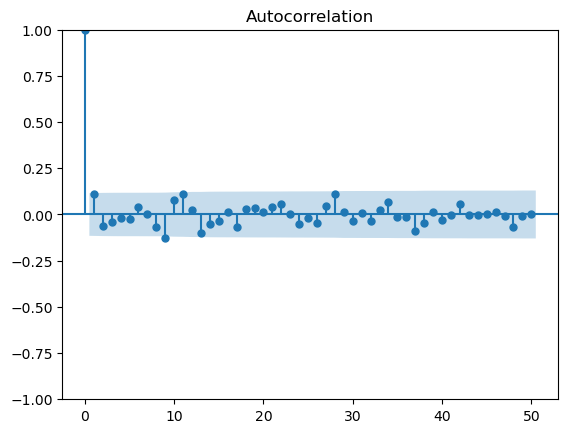

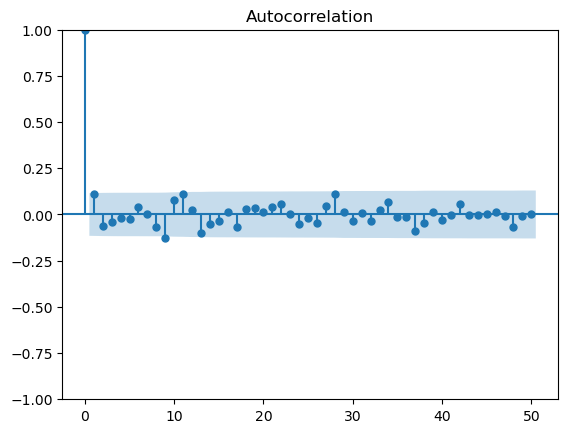

In [25]:
#===============================================================================================================================
# STATIONARITY: LOG-DIFF - ACF plot
#===============================================================================================================================
plot_acf(dfln['CloseLnDiff'], lags=50)
#-------------------------------------------------------------------------------------------------------------------------------
# No Significant AC coefficients after lag 0 
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NO AUTOCORRELATION *****
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# DATA STATIONARITY: LOG-DIFF - ADF test + ACF plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ***** RANDOM WALK *****
#-------------------------------------------------------------------------------------------------------------------------------

In [26]:
###############################################################################################################################
#
# MOVING AVERAGE (MA)
#
###############################################################################################################################

In [27]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - ADF Test & ACF Plot
#===============================================================================================================================

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Test: Stationary
# ACF Plot: No Significant Coefficients after lag 0: 9
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY + NO AUTOCORRELATION => RANDOM WALK *****
#-------------------------------------------------------------------------------------------------------------------------------

In [28]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - FORECAST
#===============================================================================================================================
pred_MALnDiff = rolling_forecast(dfln['CloseLnDiff'], testini, HORIZON, WINDOW, 'MA',(0,0,9))
pred_MALnDiff

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                  287
# Model:               SARIMAX(0, 0, 9)   Log Likelihood                 355.372
# Date:                Fri, 17 May 2024   AIC                           -690.744
# Time:                        17:43:49   BIC                           -654.150
# Sample:                             0   HQIC                          -676.078
#                                 - 287                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1          0.1399      0.051      2.731      0.006       0.040       0.240
# ma.L2         -0.0011      0.062     -0.017      0.986      -0.123       0.121
# ma.L3         -0.0024      0.058     -0.041      0.967      -0.116       0.111
# ma.L4         -0.0442      0.060     -0.740      0.459      -0.161       0.073
# ma.L5         -0.0487      0.065     -0.751      0.452      -0.176       0.078
# ma.L6          0.0503      0.061      0.831      0.406      -0.068       0.169
# ma.L7          0.0497      0.059      0.837      0.403      -0.067       0.166
# ma.L8         -0.0556      0.059     -0.945      0.345      -0.171       0.060
# ma.L9         -0.1467      0.065     -2.259      0.024      -0.274      -0.019
# sigma2         0.0049      0.000     14.842      0.000       0.004       0.006
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                82.13
# Prob(Q):                              0.72   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.78   Skew:                            -0.72
# Prob(H) (two-sided):                  0.24   Kurtosis:                         5.19
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# θ1 = 0.1399198949763258, θ2 = -0.0010831592461212573
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            CloseLnDiff   No. Observations:                  287
Model:               SARIMAX(0, 0, 9)   Log Likelihood                 355.372
Date:                Fri, 14 Jun 2024   AIC                           -690.744
Time:                        10:54:05   BIC                           -654.150
Sample:                             0   HQIC                          -676.078
                                - 287                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1399      0.051      2.731      0.006       0.040       0.240
ma.L2         -0.0011      0.062     -0.017      0.986      -0.123       0.121
ma.L3         -0.0024      0.058     -0.041      0.9

[0.0048254257224128036,
 0.009116935088220835,
 0.006536952320802375,
 -0.011143672083699796,
 -0.0031214353878236604,
 -0.00018439572511137783,
 0.012149435323808588,
 0.007076537076454745,
 -0.01779762677389286,
 -0.0005859742801386153,
 0.007185025058178272,
 0.026405690923102475]

In [29]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - COPY  testln
#===============================================================================================================================
testln.loc[testini:,'pred_MALnDiff'] = 0
testln.loc[testini:,'pred_MALnDiff'] = pred_MALnDiff
testln.loc[testini:,'pred_MALnDiff'].to_excel('Data/Output/Rolling-Ln-Monthly-MALnDiff-Test.xlsx')

testln

,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff
275,2022-12-29,11.605820,NaN,NaN,NaN
276,2023-01-31,11.638946,11.605820,10.732902,0.004825
277,2023-02-28,11.561067,11.638946,10.736173,0.009117
278,2023-03-31,11.531573,11.561067,10.739140,0.006537
279,2023-04-28,11.556288,11.531573,10.741981,-0.011144
280,2023-05-31,11.592984,11.556288,10.744889,-0.003121
281,2023-06-30,11.679177,11.592984,10.747907,-0.000184
282,2023-07-31,11.711309,11.679177,10.751209,0.012149
283,2023-08-31,11.659117,11.711309,10.754602,0.007077
284,2023-09-29,11.666206,11.659117,10.757787,-0.017798


In [30]:
#===============================================================================================================================
# MA: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Log Diff       MSE      RMSE
#-------------------------------
# 2 MA        0.003198  0.056547
#-------------------------------------------------------------------------------------------------------------------------------

,Log Diff,MSE,RMSE
0,MA,0.003198,0.056547


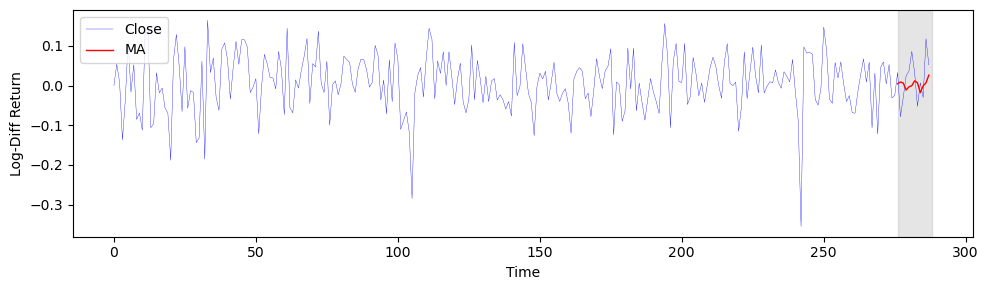

In [31]:
#===============================================================================================================================
# MA: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[:testini+1,'CloseLnDiff']        ,'b-', linewidth=0.25) 
ax.plot(dfln.loc[testini+1:totallen,'CloseLnDiff'],'b-', linewidth=0.25, label='Close')
ax.plot(testln.loc[:totallen,'pred_MALnDiff']     ,'r-', linewidth=1.0, label='MA')
ax.axvspan(testini,totallen, color='#808080', alpha=0.2)
ax.legend(loc=2)
#plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()


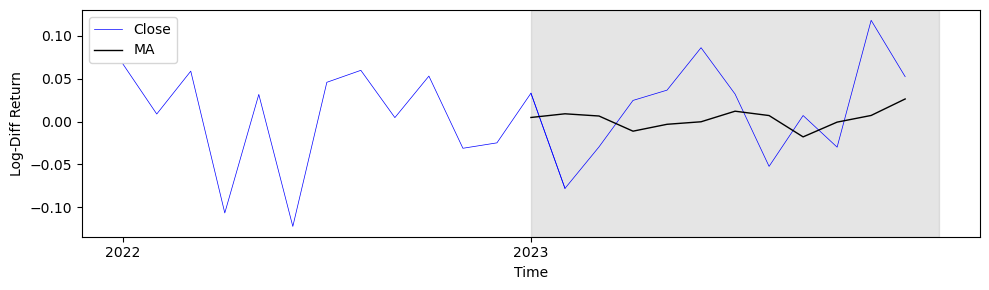

In [32]:
#===============================================================================================================================
# MA: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:testini+1,'CloseLnDiff'],'b-', linewidth=0.5) 
ax.plot(dfln.loc[testini:totallen,'CloseLnDiff']         ,'b-', linewidth=0.5, label='Close')
ax.plot(testln.loc[testini:totallen,'pred_MALnDiff']     ,'k-', linewidth=1.0, label='MA')
ax.axvspan(testini,totallen, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()


In [33]:
#===============================================================================================================================
# MA: LOG - RECOVER
#===============================================================================================================================
dfln['pred_MALn'] = 0.0
dfln.loc[testini:,'pred_MALn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_MALnDiff']
dfln.loc[:,'pred_MALn'].to_excel('Data/Output/Rolling-Ln-Monthly-MALn.xlsx')
dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn
275,2022-12-29,109734.60,11.605820,-0.024764,0.000000,0.000000,0.000000
276,2023-01-31,113430.54,11.638946,0.033126,11.605820,10.732902,11.610645
277,2023-02-28,104931.93,11.561067,-0.077879,11.638946,10.736173,11.648063
278,2023-03-31,101882.20,11.531573,-0.029495,11.561067,10.739140,11.567604
279,2023-04-28,104431.63,11.556288,0.024715,11.531573,10.741981,11.520429
280,2023-05-31,108335.07,11.592984,0.036696,11.556288,10.744889,11.553166
281,2023-06-30,118087.00,11.679177,0.086193,11.592984,10.747907,11.592800
282,2023-07-31,121942.98,11.711309,0.032132,11.679177,10.751209,11.691326
283,2023-08-31,115741.81,11.659117,-0.052192,11.711309,10.754602,11.718385
284,2023-09-29,116565.17,11.666206,0.007089,11.659117,10.757787,11.641320


In [34]:
#===============================================================================================================================
# MA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6))  , "{:,}".format(round(sqrt(mse_Mean),6))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#
#-------------------------------------------------------------------------------------------------------------------------------
#    Log   MSE       RMSE
#----------------------------
# 0 Last   0.003235  0.056875
# 1 Mean   0.814346  0.902411
# 2   MA   0.003198  0.056547
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.003235,0.056875
1,Mean,0.814346,0.902411
2,MA,0.003198,0.056547


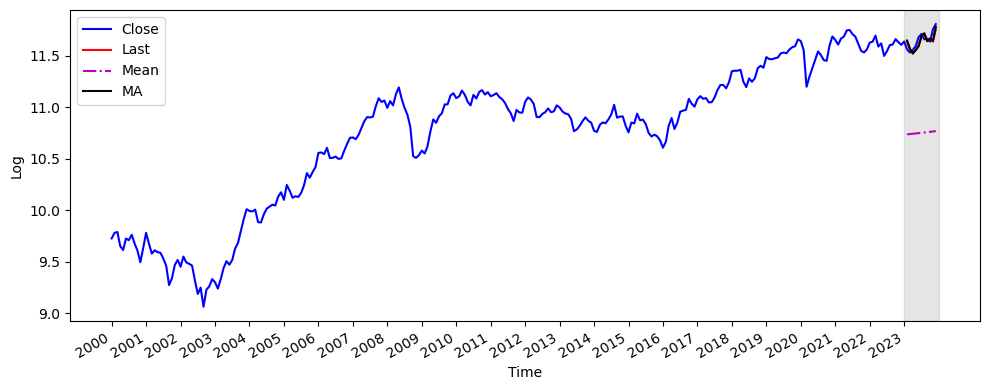

In [35]:
#===============================================================================================================================
# MA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln['CloseLn'], 'b-', label='Close')    
ax.plot(dfln.loc[testini+1:,'pred_LastLn'], 'r-' , label='Last')
ax.plot(dfln.loc[testini+1:,'pred_MeanLn'], 'm-.', label='Mean')
ax.plot(dfln.loc[testini+1:,'pred_MALn']  , 'k-' , label='MA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


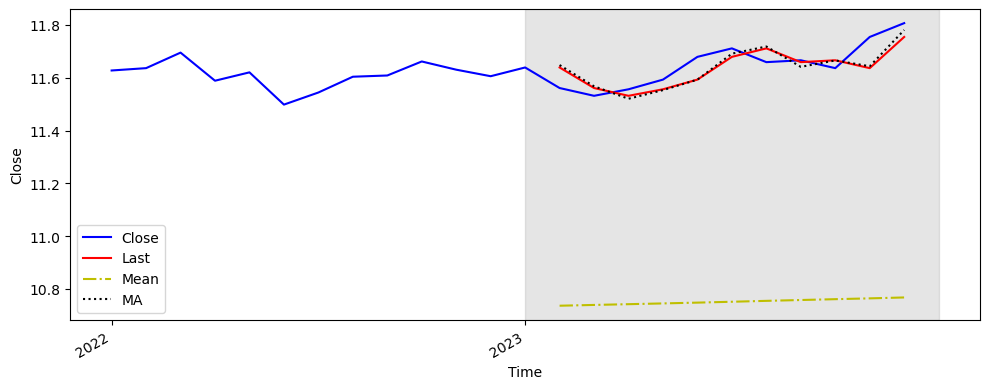

In [36]:
#===============================================================================================================================
# MA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'] , 'b-' , label='Close')    
ax.plot(dfln.loc[testini+1:,'pred_LastLn']  , 'r-' , label='Last')
ax.plot(dfln.loc[testini+1:,'pred_MeanLn']  , 'y-.', label='Mean')
ax.plot(dfln.loc[testini+1:,'pred_MALn']    , 'k:' , label='MA')   

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [37]:
#===============================================================================================================================
# MA: PRICE - RECOVER
#===============================================================================================================================
df['pred_MA'] = 0.0
df.loc[testini:,'pred_MA']= np.round(np.exp(dfln.loc[testini:,'pred_MALn']),2)
df.loc[:,'pred_MA'].to_excel('Data/Output/Rolling-Ln-Monthly-MA.xlsx')

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA
275,2022-12-29,109734.60,0.00,0.00,0.00
276,2023-01-31,113430.54,109734.60,55666.44,110265.40
277,2023-02-28,104931.93,113430.54,55874.98,114469.41
278,2023-03-31,101882.20,104931.93,56051.44,105620.11
279,2023-04-28,104431.63,101882.20,56215.71,100753.16
280,2023-05-31,108335.07,104431.63,56387.91,104106.16
281,2023-06-30,118087.00,108335.07,56572.78,108315.10
282,2023-07-31,121942.98,118087.00,56790.91,119530.44
283,2023-08-31,115741.81,121942.98,57021.13,122808.97
284,2023-09-29,116565.17,115741.81,57227.89,113700.10


In [38]:
#===============================================================================================================================
# MA: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last),))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean),))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA  ),))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price          MSE    RMSE
#------------------------------
# 0  Last    43,832,846   6,621
# 1  Mean 3,470,811,963  58,914
# 2  MA      42,313,143   6,505
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,"43,832,846","6,621"
1,Mean,"3,470,811,963","58,914"
2,MA,"42,313,143","6,505"


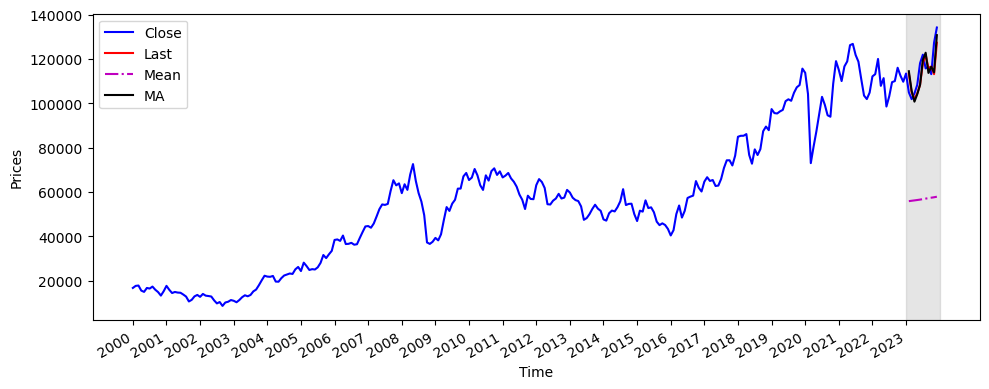

In [39]:
#===============================================================================================================================
# MA: PRICES - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini+1:,'pred_Last'], 'r-' , label='Last')
ax.plot(df.loc[testini+1:,'pred_Mean'], 'm-.', label='Mean')
ax.plot(df.loc[testini+1:,'pred_MA']  , 'k-' , label='MA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Prices')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

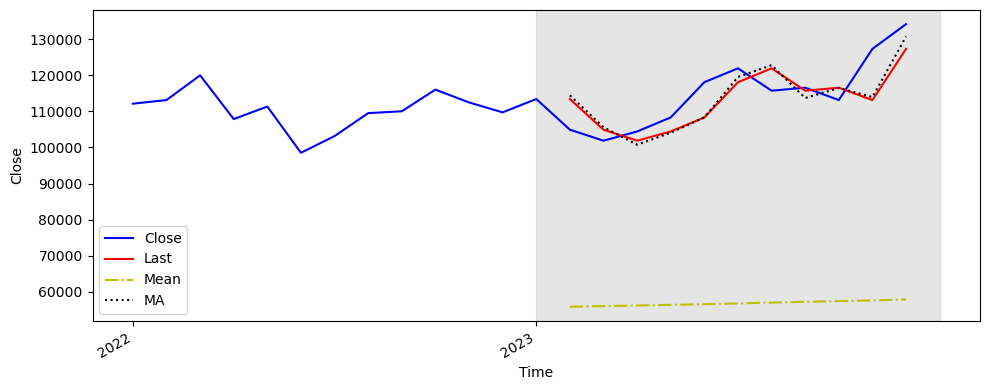

In [40]:
#===============================================================================================================================
# MA: PRICES - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close'] , 'b-' , label='Close')    
ax.plot(df.loc[testini+1:,'pred_Last']  , 'r-' , label='Last')
ax.plot(df.loc[testini+1:,'pred_Mean']  , 'y-.', label='Mean')
ax.plot(df.loc[testini+1:,'pred_MA']    , 'k:' , label='MA')   

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [41]:
################################################################################################################################
#
# AUTOREGRESSIVE (AR)
#
################################################################################################################################

In [42]:
#===============================================================================================================================
# AR: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF Test: Statistics, p-value -> Non Stationary
# ACF Plot: Slowing decaying -> AutoCorrelation present
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

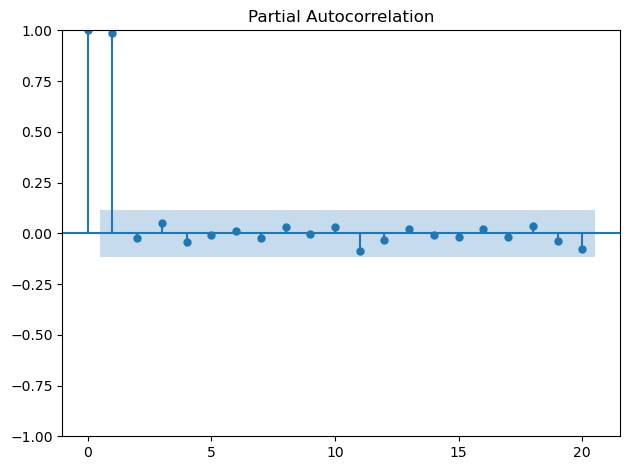

In [43]:
#===============================================================================================================================
# AR: LOG - PACF Plot -  AR(p) order
#===============================================================================================================================
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfln['CloseLn'], lags=20)
plt.tight_layout()

#-------------------------------------------------------------------------------------------------------------------------------
# PACF - order 1 AR(1)
#-------------------------------------------------------------------------------------------------------------------------------
# ****** AR(1) process ******
#-------------------------------------------------------------------------------------------------------------------------------

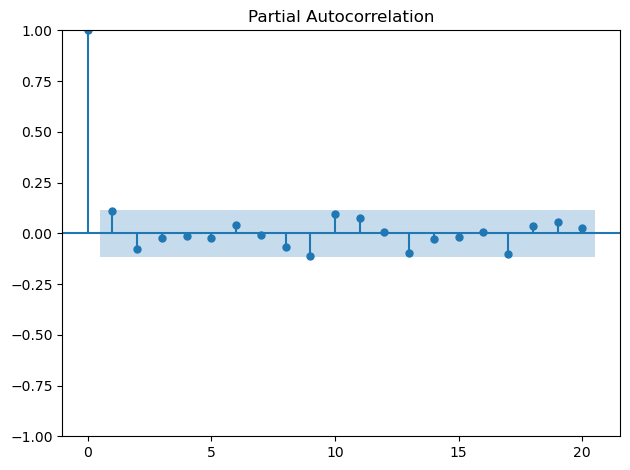

In [44]:
#===============================================================================================================================
# AR: LOG-DIFF - PACF Plot - Identifies the order p of AR process
#===============================================================================================================================
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfln['CloseLnDiff'], lags=20)
plt.tight_layout()

#-------------------------------------------------------------------------------------------------------------------------------
# PACF - NO AUTOCORRELATION
#-------------------------------------------------------------------------------------------------------------------------------
# ****** AR(0) process ******
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# AR: LOG-DIFF - ADF Test + PACF Plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ****** RANDOM WALK ******
#-------------------------------------------------------------------------------------------------------------------------------

In [45]:
#===============================================================================================================================
# AR: LOG-DIFF - ROLLING FORECAST
#===============================================================================================================================
pred_ARLnDiff = rolling_forecast(dfln['CloseLnDiff'], testini, HORIZON, WINDOW, 'AR', (1,0,0))

testln.loc[testini:,'pred_ARLnDiff'] = 0
testln.loc[testini:,'pred_ARLnDiff'] = pred_ARLnDiff
testln.loc[testini:,'pred_ARLnDiff'].to_excel('Data/Output/Rolling-Ln-Monthly-ARLnDiff.xlsx')

testln

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                  287
# Model:               SARIMAX(1, 0, 0)   Log Likelihood                 351.457
# Date:                Fri, 17 May 2024   AIC                           -698.915
# Time:                        17:54:27   BIC                           -691.596
# Sample:                             0   HQIC                          -695.981
#                                 - 287                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1          0.1148      0.049      2.362      0.018       0.020       0.210
# sigma2         0.0051      0.000     16.154      0.000       0.004       0.006
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                72.24
# Prob(Q):                              0.99   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.81   Skew:                            -0.66
# Prob(H) (two-sided):                  0.32   Kurtosis:                         5.07
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# phi1 = 0.11477227621899816, phi2 = 0.0050564127986978
# 
#-------------------------------------------------------------------------------------------------------------------------------

                               SARIMAX Results                                
Dep. Variable:            CloseLnDiff   No. Observations:                  287
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 351.457
Date:                Fri, 14 Jun 2024   AIC                           -698.915
Time:                        10:54:09   BIC                           -691.596
Sample:                             0   HQIC                          -695.981
                                - 287                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1148      0.049      2.362      0.018       0.020       0.210
sigma2         0.0051      0.000     16.154      0.000       0.004       0.006
Ljung-Box (L1) (Q):                   0.00   Jarque-

,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff,pred_ARLnDiff
275,2022-12-29,11.605820,NaN,NaN,NaN,NaN
276,2023-01-31,11.638946,11.605820,10.732902,0.004825,-0.002901
277,2023-02-28,11.561067,11.638946,10.736173,0.009117,0.003859
278,2023-03-31,11.531573,11.561067,10.739140,0.006537,-0.008927
279,2023-04-28,11.556288,11.531573,10.741981,-0.011144,-0.003413
280,2023-05-31,11.592984,11.556288,10.744889,-0.003121,0.002846
281,2023-06-30,11.679177,11.592984,10.747907,-0.000184,0.004247
282,2023-07-31,11.711309,11.679177,10.751209,0.012149,0.010155
283,2023-08-31,11.659117,11.711309,10.754602,0.007077,0.003828
284,2023-09-29,11.666206,11.659117,10.757787,-0.017798,-0.006153


In [46]:
#===============================================================================================================================
# AR: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_ARLnDiff'  ])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA  ,6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log Diff     MSE      RMSE
#------------------------------
# 0  MA      0.003198  0.056547
# 1  AR      0.003174  0.056342
#-------------------------------------------------------------------------------------------------------------------------------

,Log Diff,MSE,RMSE
0,MA,0.003198,0.056547
1,AR,0.003174,0.056342


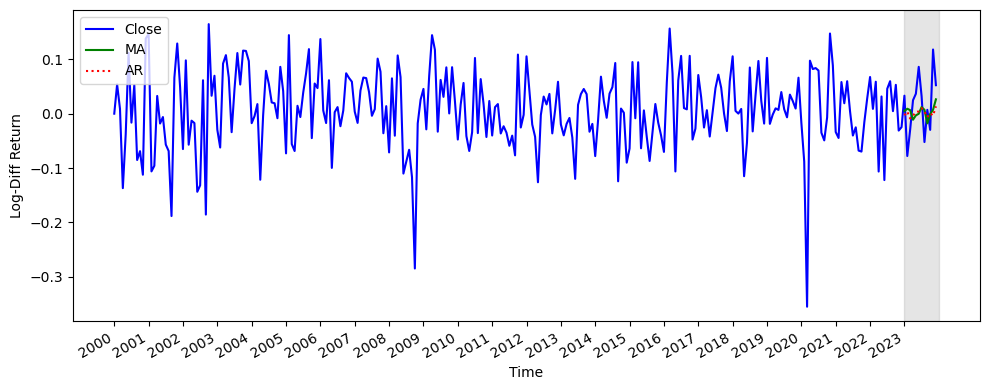

In [47]:
#===============================================================================================================================
# AR: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln['CloseLnDiff']    , 'b-', label='Close')    
ax.plot(testln['pred_MALnDiff'], 'g-', label='MA')   
ax.plot(testln['pred_ARLnDiff'], 'r:', label='AR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

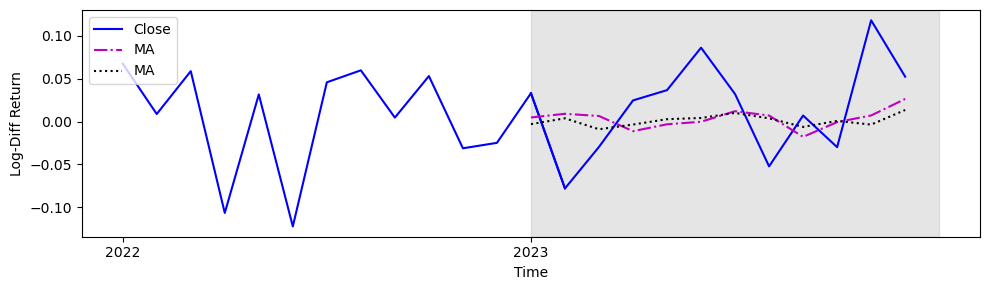

In [48]:
#===============================================================================================================================
# AR: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:testini+1,'CloseLnDiff'],    'b-') 
ax.plot(dfln.loc[testini:totallen,'CloseLnDiff'],    'b-', label='Close')
ax.plot(testln.loc[testini:totallen,'pred_MALnDiff'],  'm-.', label='MA')
ax.plot(testln.loc[testini:totallen,'pred_ARLnDiff'],  'k:', label='MA')
ax.axvspan(testini,testini+testlen, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()

In [49]:
#===============================================================================================================================
# AR: LOG - RECOVER
#===============================================================================================================================
dfln['pred_ARLn'] = 0.0
dfln.loc[testini:,'pred_ARLn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_ARLnDiff']
dfln.loc[testini:,'pred_ARLn'].to_excel('Data/Output/Rolling-Ln-Monthly-ARLn.xlsx')
dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn
275,2022-12-29,109734.60,11.605820,-0.024764,0.000000,0.000000,0.000000,0.000000
276,2023-01-31,113430.54,11.638946,0.033126,11.605820,10.732902,11.610645,11.602919
277,2023-02-28,104931.93,11.561067,-0.077879,11.638946,10.736173,11.648063,11.642805
278,2023-03-31,101882.20,11.531573,-0.029495,11.561067,10.739140,11.567604,11.552141
279,2023-04-28,104431.63,11.556288,0.024715,11.531573,10.741981,11.520429,11.528159
280,2023-05-31,108335.07,11.592984,0.036696,11.556288,10.744889,11.553166,11.559134
281,2023-06-30,118087.00,11.679177,0.086193,11.592984,10.747907,11.592800,11.597231
282,2023-07-31,121942.98,11.711309,0.032132,11.679177,10.751209,11.691326,11.689332
283,2023-08-31,115741.81,11.659117,-0.052192,11.711309,10.754602,11.718385,11.715136
284,2023-09-29,116565.17,11.666206,0.007089,11.659117,10.757787,11.641320,11.652965


In [50]:
#===============================================================================================================================
# AR: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6 ))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6 ))  , "{:,}".format(round(sqrt(mse_Mean),6))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,6 ))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6 ))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#
#-----------------------------
#    Log   MSE       RMSE
#-----------------------------
# 0  Last  0.003235  0.056875
# 1  Mean  0.814346  0.902411
# 2  MA    0.003198  0.056547
# 3  AR    0.003174  0.056342
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.003235,0.056875
1,Mean,0.814346,0.902411
2,MA,0.003198,0.056547
3,AR,0.003174,0.056342


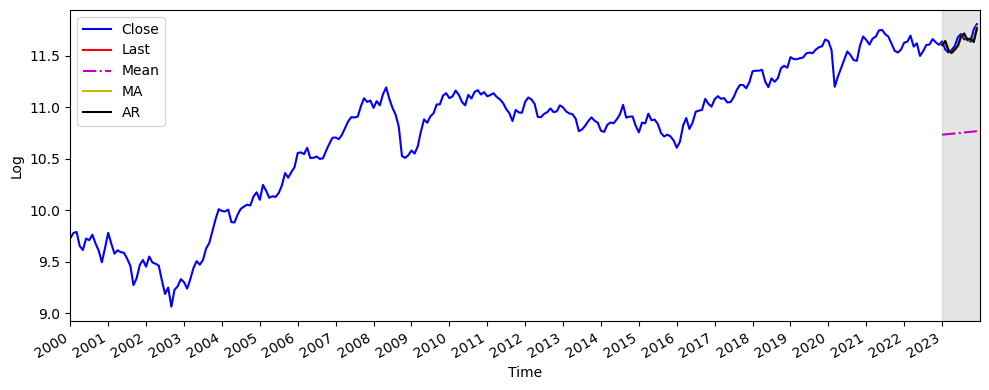

In [51]:
#===============================================================================================================================
# AR: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln['CloseLn']                 , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn'], 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'], 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']  , 'y-' , label='MA')   
ax.plot(dfln.loc[testini:,'pred_ARLn']  , 'k-' , label='AR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

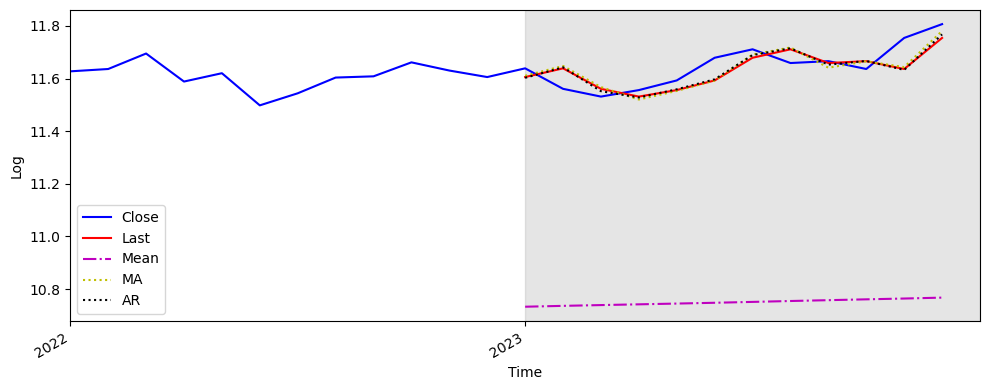

In [52]:
#===============================================================================================================================
# AR: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'], 'b-' , label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn']    , 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']      , 'y:' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']      , 'k:' , label='AR')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [53]:
#===============================================================================================================================
# AR: PRICES - RECOVER
#===============================================================================================================================
df['pred_AR'] = 0.0
df.loc[testini:,'pred_AR']= np.round(np.exp(dfln.loc[testini:,'pred_ARLn']),2)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR
275,2022-12-29,109734.60,0.00,0.00,0.00,0.00
276,2023-01-31,113430.54,109734.60,55666.44,110265.40,109416.77
277,2023-02-28,104931.93,113430.54,55874.98,114469.41,113869.16
278,2023-03-31,101882.20,104931.93,56051.44,105620.11,103999.42
279,2023-04-28,104431.63,101882.20,56215.71,100753.16,101535.02
280,2023-05-31,108335.07,104431.63,56387.91,104106.16,104729.28
281,2023-06-30,118087.00,108335.07,56572.78,108315.10,108796.16
282,2023-07-31,121942.98,118087.00,56790.91,119530.44,119292.29
283,2023-08-31,115741.81,121942.98,57021.13,122808.97,122410.63
284,2023-09-29,116565.17,115741.81,57227.89,113700.10,115031.89


In [54]:
#===============================================================================================================================
# AR: PRICES - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last),))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean),))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA  ),))] ,
                ['AR'    , "{:,}".format(round(mse_AR,  ))  , "{:,}".format(round(sqrt(mse_AR  ),))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price           MSE   RMSE
#--------------------------------
# 0  Last     43,832,846  6,621
# 1  Mean  3,470,811,963 58,914
# 2  MA       42,313,143  6,505
# 3  AR       42,768,145  6,540
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,"43,832,846","6,621"
1,Mean,"3,470,811,963","58,914"
2,MA,"42,313,143","6,505"
3,AR,"42,768,145","6,540"


In [55]:
################################################################################################################################
#
# ARMA
#
################################################################################################################################

#===============================================================================================================================
# ARMA: OPTIMIZE Function - AIC (Akaike Information Criterion)
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
             continue
        
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [56]:
#===============================================================================================================================
# ARMA: PARAMETERS ps, qs
#===============================================================================================================================
from itertools import product
ps = range(0,  3, 1)    
qs = range(0, 10, 1)     

order_list = list(product(ps, qs))
print(len(order_list))

order_list


30


[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9)]

In [57]:
#===============================================================================================================================
# ARMA: TRAIN SET
#===============================================================================================================================
train = df.Close[:trainfin+1]
trainLn = dfln.CloseLn[:trainfin+1]
trainLnDiff = dfln.CloseLnDiff[:trainfin+1]
trainLnDiff

0      0.000000
1      0.053848
2      0.009029
3     -0.137079
4     -0.038110
         ...   
271    0.059807
272    0.004681
273    0.053095
274   -0.031081
275   -0.024764
Name: CloseLnDiff, Length: 276, dtype: float64

In [58]:
#===============================================================================================================================
# ARMA: Optimize_ARMA
#===============================================================================================================================
result_df = optimize_ARMA(trainLnDiff, order_list) 
result_df

#-------------------------------------------------------------------------------------------------------------------------------
# ps = range(0,  3, 1)    
# qs = range(0, 10, 1)     
#
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 96/96 [04:11<00:00, 3.61s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#    (p, q)          AIC
# ----------------------
# 0  (2, 3)  -669.134330
# 1  (0, 1)  -668.731641
# 2  (1, 0)  -668.227207
# 3  (2, 0)  -667.534976
# 4  (2, 5)  -667.361052
# 5  (0, 2)  -667.347519
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\AppData\Local\Temp\ipykernel_4800\3345244493.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/30 [00:00<?, ?it/s]

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: N

,"(p,q)",AIC
0,"(2, 3)",-669.134330
1,"(0, 1)",-668.731641
2,"(1, 0)",-668.227207
3,"(2, 0)",-667.534976
4,"(2, 5)",-667.361052
5,"(0, 2)",-667.347519
6,"(1, 1)",-667.122351
7,"(0, 0)",-666.429881
8,"(0, 3)",-665.613792
9,"(2, 1)",-665.572637


In [59]:
#===============================================================================================================================
# ARMA: LOG-DIFF - ROLLING FORECAST
#===============================================================================================================================
pred_ARMALnDiff = rolling_forecast(dfln['CloseLnDiff'], testini, HORIZON, WINDOW, 'ARMA',(2,0,3))

testln.loc[testini:,'pred_ARMALnDiff'] = 0
testln.loc[testini:,'pred_ARMALnDiff'] = pred_ARMALnDiff
testln.loc[testini:,'pred_ARMALnDiff'].to_excel('Data/Output/Rolling-Ln-Monthly-ARMALnDiff.xlsx')
testln

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                  287
# Model:               SARIMAX(2, 0, 3)   Log Likelihood                 355.294
# Date:                Fri, 17 May 2024   AIC                           -698.587
# Time:                        18:07:32   BIC                           -676.630
# Sample:                             0   HQIC                          -689.787
#                                 - 287                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1          0.1307      0.081      1.616      0.106      -0.028       0.289
# ar.L2         -0.8933      0.068    -13.169      0.000      -1.026      -0.760
# ma.L1          0.0130      0.090      0.144      0.885      -0.164       0.190
# ma.L2          0.9297      0.058     16.130      0.000       0.817       1.043
# ma.L3          0.1610      0.055      2.930      0.003       0.053       0.269
# sigma2         0.0049      0.000     16.075      0.000       0.004       0.006
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                74.85
# Prob(Q):                              0.65   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.82   Skew:                            -0.63
# Prob(H) (two-sided):                  0.32   Kurtosis:                         5.16
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# θ = 0.13065178652592369, σ2 = -0.893255399031345
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

                               SARIMAX Results                                
Dep. Variable:            CloseLnDiff   No. Observations:                  287
Model:               SARIMAX(2, 0, 3)   Log Likelihood                 355.294
Date:                Fri, 14 Jun 2024   AIC                           -698.587
Time:                        10:54:34   BIC                           -676.630
Sample:                             0   HQIC                          -689.787
                                - 287                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1307      0.081      1.616      0.106      -0.028       0.289
ar.L2         -0.8933      0.068    -13.169      0.000      -1.026      -0.760
ma.L1          0.0130      0.090      0.144      0.8

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff,pred_ARLnDiff,pred_ARMALnDiff
275,2022-12-29,11.605820,NaN,NaN,NaN,NaN,NaN
276,2023-01-31,11.638946,11.605820,10.732902,0.004825,-0.002901,0.000836
277,2023-02-28,11.561067,11.638946,10.736173,0.009117,0.003859,0.007290
278,2023-03-31,11.531573,11.561067,10.739140,0.006537,-0.008927,-0.001238
279,2023-04-28,11.556288,11.531573,10.741981,-0.011144,-0.003413,-0.008602
280,2023-05-31,11.592984,11.556288,10.744889,-0.003121,0.002846,-0.000852
281,2023-06-30,11.679177,11.592984,10.747907,-0.000184,0.004247,0.016773
282,2023-07-31,11.711309,11.679177,10.751209,0.012149,0.010155,0.015216
283,2023-08-31,11.659117,11.711309,10.754602,0.007077,0.003828,0.011893
284,2023-09-29,11.666206,11.659117,10.757787,-0.017798,-0.006153,-0.013135


In [60]:
#===============================================================================================================================
# ARMA: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_ARLnDiff'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_ARMALnDiff'])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA  ,6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,6))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log Diff     MSE      RMSE
#------------------------------
# 0  MA  0.000118  0.010843
# 1  AR  0.000118  0.010859
# 2  ARMA  0.000118  0.010841
#-------------------------------------------------------------------------------------------------------------------------------

,Log Diff,MSE,RMSE
0,MA,0.003198,0.056547
1,AR,0.003174,0.056342
2,ARMA,0.002991,0.054687


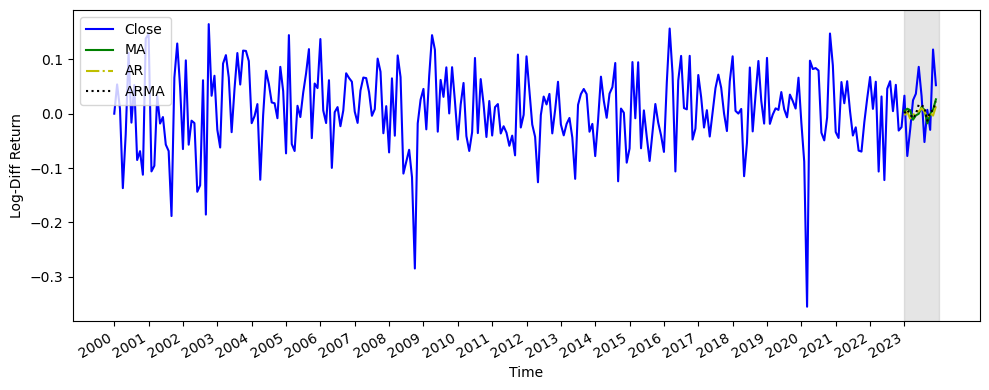

In [61]:
#===============================================================================================================================
# ARMA: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln['CloseLnDiff']      , 'b-' , label='Close')
ax.plot(testln['pred_MALnDiff']  , 'g-' , label='MA')
ax.plot(testln['pred_ARLnDiff']  , 'y-.', label='AR')
ax.plot(testln['pred_ARMALnDiff'], 'k:' , label='ARMA')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


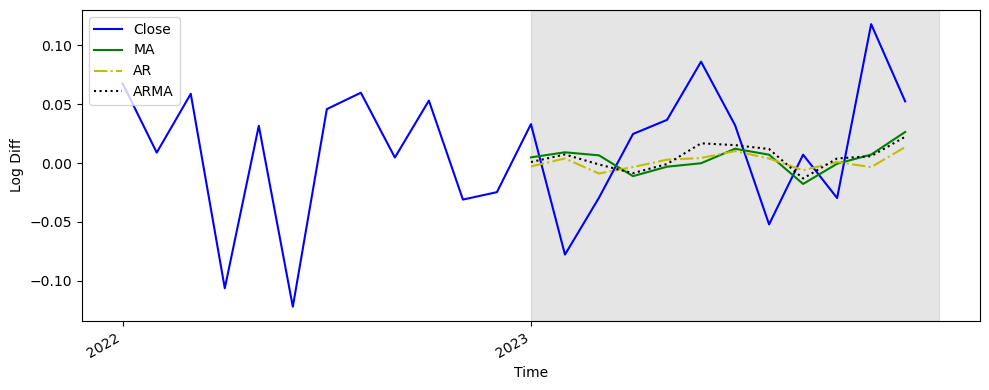

In [62]:
#===============================================================================================================================
# ARMA: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLnDiff'], 'b-' , label='Close')
ax.plot(testln.loc[-testlen:,'pred_MALnDiff']   , 'g-' , label='MA')
ax.plot(testln.loc[-testlen:,'pred_ARLnDiff']   , 'y-.', label='AR')
ax.plot(testln.loc[-testlen:,'pred_ARMALnDiff'] , 'k:' , label='ARMA')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log Diff')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
plt.xticks(np.arange(testini-testlen, totallen, testlen), [2022, 2023])
fig.autofmt_xdate()
plt.tight_layout()



In [63]:
#===============================================================================================================================
# ARMA: LOG - RECOVER
#===============================================================================================================================
dfln['pred_ARMALn'] = 0.0
dfln.loc[testini:,'pred_ARMALn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_ARMALnDiff']
dfln[testini-1:]



,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn,pred_ARMALn
275,2022-12-29,109734.60,11.605820,-0.024764,0.000000,0.000000,0.000000,0.000000,0.000000
276,2023-01-31,113430.54,11.638946,0.033126,11.605820,10.732902,11.610645,11.602919,11.606656
277,2023-02-28,104931.93,11.561067,-0.077879,11.638946,10.736173,11.648063,11.642805,11.646236
278,2023-03-31,101882.20,11.531573,-0.029495,11.561067,10.739140,11.567604,11.552141,11.559829
279,2023-04-28,104431.63,11.556288,0.024715,11.531573,10.741981,11.520429,11.528159,11.522971
280,2023-05-31,108335.07,11.592984,0.036696,11.556288,10.744889,11.553166,11.559134,11.555436
281,2023-06-30,118087.00,11.679177,0.086193,11.592984,10.747907,11.592800,11.597231,11.609757
282,2023-07-31,121942.98,11.711309,0.032132,11.679177,10.751209,11.691326,11.689332,11.694393
283,2023-08-31,115741.81,11.659117,-0.052192,11.711309,10.754602,11.718385,11.715136,11.723202
284,2023-09-29,116565.17,11.666206,0.007089,11.659117,10.757787,11.641320,11.652965,11.645983


In [64]:
#===============================================================================================================================
# ARMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8))  , "{:,}".format(round(sqrt(mse_Mean) ,6))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE      RMSE
#-------------------------------
# 0  Last  0.00323479  0.056875
# 1  Mean  0.81434572  0.902411
# 2  MA    0.00319756  0.056547
# 3  AR    0.00317437  0.056342
# 4  ARMA  0.00299064  0.054687
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.00323479,0.056875
1,Mean,0.81434572,0.902411
2,MA,0.00319756,0.056547
3,AR,0.00317437,0.056342
4,ARMA,0.00299064,0.054687


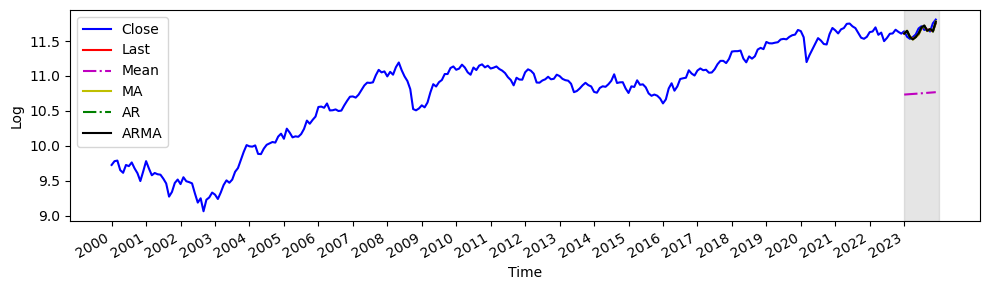

In [65]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Log - Plot
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln['CloseLn'], 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn'], 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'], 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']  , 'y-' , label='MA')   
ax.plot(dfln.loc[testini:,'pred_ARLn']  , 'g-.', label='AR')   
ax.plot(dfln.loc[testini:,'pred_ARMALn'], 'k-' , label='ARMA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


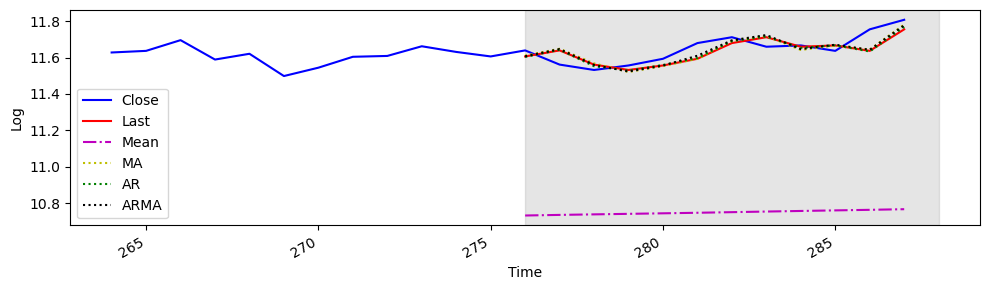

In [66]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Log - Plot (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']   , 'b-', label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn'] , 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'] , 'm-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']   , 'y:' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']   , 'g:' , label='AR')
ax.plot(dfln.loc[testini:,'pred_ARMALn'] , 'k:' , label='ARMA')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks([testini-totallen, totallen],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [67]:
#===============================================================================================================================
# ARMA: PRICE - RECOVER
#===============================================================================================================================
df['pred_ARMA'] = 0.0
df.loc[testini:,'pred_ARMA']= np.round(np.exp(dfln.loc[testini:,'pred_ARMALn']),2)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR,pred_ARMA
275,2022-12-29,109734.60,0.00,0.00,0.00,0.00,0.00
276,2023-01-31,113430.54,109734.60,55666.44,110265.40,109416.77,109826.35
277,2023-02-28,104931.93,113430.54,55874.98,114469.41,113869.16,114260.51
278,2023-03-31,101882.20,104931.93,56051.44,105620.11,103999.42,104802.10
279,2023-04-28,104431.63,101882.20,56215.71,100753.16,101535.02,101009.61
280,2023-05-31,108335.07,104431.63,56387.91,104106.16,104729.28,104342.70
281,2023-06-30,118087.00,108335.07,56572.78,108315.10,108796.16,110167.46
282,2023-07-31,121942.98,118087.00,56790.91,119530.44,119292.29,119897.53
283,2023-08-31,115741.81,121942.98,57021.13,122808.97,122410.63,123401.96
284,2023-09-29,116565.17,115741.81,57227.89,113700.10,115031.89,114231.53


In [68]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Price - Performance
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])
mse_ARMA = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last),))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean),))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA)  ,))] ,
                ['AR'    , "{:,}".format(round(mse_AR,  ))  , "{:,}".format(round(sqrt(mse_AR)  ,))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,))  , "{:,}".format(round(sqrt(mse_ARMA),))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Model        MSE       RMSE
#-------------------------------
# 0  Last     43,832,846   6,621
# 1  Mean  3,470,811,963  58,914
# 2  MA       42,313,143   6,505
# 3  AR       42,768,145   6,540
# 4  ARMA     40,083,807   6,331
#-------------------------------------------------------------------------------------------------------------------------------

,Model,MSE,RMSE
0,Last,"43,832,846","6,621"
1,Mean,"3,470,811,963","58,914"
2,MA,"42,313,143","6,505"
3,AR,"42,768,145","6,540"
4,ARMA,"40,083,807","6,331"


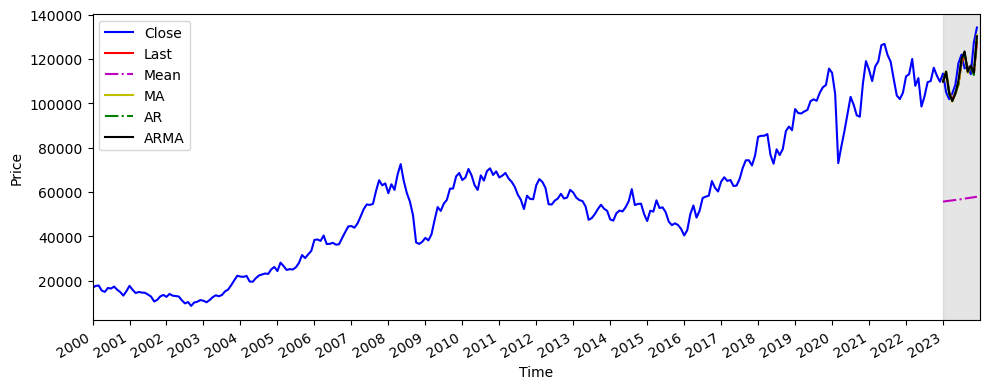

In [69]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Price - Plot
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini:,'pred_Last'], 'r-' , label='Last')
ax.plot(df.loc[testini:,'pred_Mean'], 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']  , 'y-' , label='MA')   
ax.plot(df.loc[testini:,'pred_AR']  , 'g-.', label='AR')   
ax.plot(df.loc[testini:,'pred_ARMA'], 'k-' , label='ARMA')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

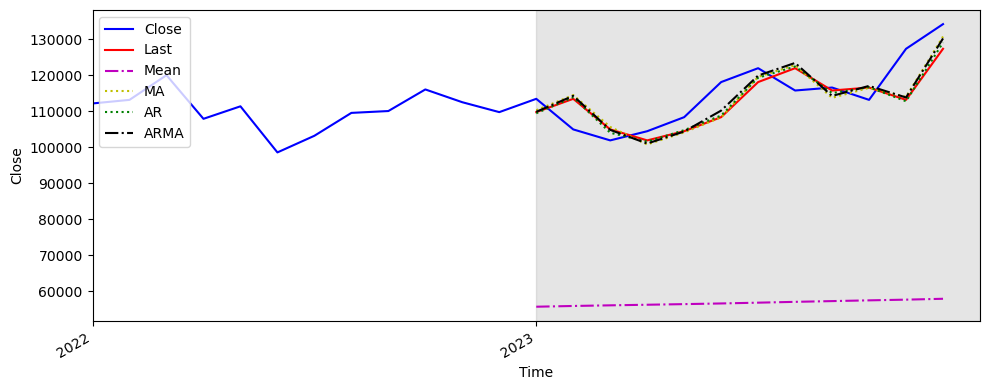

In [70]:
#===============================================================================================================================
# ARMA: Log-Diff - Recover - Price - Plot (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close']  , 'b-' , label='Close')
ax.plot(df.loc[testini:,'pred_Last'], 'r-' , label='Last')
ax.plot(df.loc[testini:,'pred_Mean'], 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']  , 'y:' , label='MA')
ax.plot(df.loc[testini:,'pred_AR']  , 'g:' , label='AR')
ax.plot(df.loc[testini:,'pred_ARMA'], 'k-.', label='ARMA')

ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [71]:
################################################################################################################################
#
# ARIMA
#
################################################################################################################################

#===============================================================================================================================
# ARIMA: optimize_ARIMA() FUNCTION - AIC - fits all unique ARIMA(p,q) models
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
#from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
#please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:     
    
    results = []   

    for order in tqdm_notebook(order_list):    
    #for order in tqdm.notebook.tqdm(order_list):    
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)     
        except:
            continue 
        
        aic = model.aic   
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)    
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)   
    
    return result_df

In [72]:
#===============================================================================================================================
# ARIMA: LOG - TRAIN SET - trainln
#===============================================================================================================================
trainln = dfln.CloseLn[:testini]
trainln

0       9.725221
1       9.779069
2       9.788097
3       9.651018
4       9.612909
         ...    
271    11.603889
272    11.608570
273    11.661665
274    11.630584
275    11.605820
Name: CloseLn, Length: 276, dtype: float64

In [73]:
#===============================================================================================================================
# ARIMA: LOG - PARAMETERS list
#===============================================================================================================================
from itertools import product
#-------------------------------------------------------------------------------------------------------------------------------
# Stationary Random walk with 1 diff
#-------------------------------------------------------------------------------------------------------------------------------
d = 1

#-------------------------------------------------------------------------------------------------------------------------------
# AR(6), MA(6)
#-------------------------------------------------------------------------------------------------------------------------------
ps = range(0, 12, 1)   
qs = range(0, 12, 1)   

order_list = list(product(ps, qs)) 
len(order_list)

144

In [74]:
#===============================================================================================================================
# ARIMA: LOG - PARAMETERRS - optimize_ARIMA (AIC)
#===============================================================================================================================
#result_df = optimize_ARIMA(trainln, order_list, d) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 100% 144/144 [01:55<00:00, 1.55s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#--------------------------
#     (p,q)          AIC
#--------------------------
# 0  (2, 3)  -666.501519
# 1  (0, 1)  -665.304534
# 2  (1, 0)  -664.801098
# 3  (2, 0)  -664.103639
# 4  (0, 2)  -663.913691
#-------------------------------------------------------------------------------------------------------------------------------

In [75]:
#===============================================================================================================================
# ARIMA: LOG - FORECAST
#===============================================================================================================================
model = SARIMAX(trainln, order=(2,1,3), simple_differencing=False)   
model_fit = model.fit(disp=False)

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
#===============================================================================================================================
# ARIMA: Log - Summary
#===============================================================================================================================
print(model_fit.summary())

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                CloseLn   No. Observations:                  276
# Model:               SARIMAX(2, 1, 3)   Log Likelihood                 339.251
# Date:                Fri, 17 May 2024   AIC                           -666.502
# Time:                        18:32:07   BIC                           -644.801
# Sample:                             0   HQIC                          -657.792
#                                 - 276                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1          0.1273      0.041      3.106      0.002       0.047       0.208
# ar.L2         -0.9148      0.038    -24.260      0.000      -0.989      -0.841
# ma.L1          0.0043      0.066      0.065      0.948      -0.126       0.134
# ma.L2          0.9694      0.076     12.672      0.000       0.819       1.119
# ma.L3          0.1625      0.057      2.863      0.004       0.051       0.274
# sigma2         0.0049      0.000     10.507      0.000       0.004       0.006
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                70.80
# Prob(Q):                              0.82   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.77   Skew:                            -0.63
# Prob(H) (two-sided):                  0.21   Kurtosis:                         5.14
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
#-------------------------------------------------------------------------------------------------------------------------------

                               SARIMAX Results                                
Dep. Variable:                CloseLn   No. Observations:                  276
Model:               SARIMAX(2, 1, 3)   Log Likelihood                 339.251
Date:                Fri, 14 Jun 2024   AIC                           -666.502
Time:                        10:54:39   BIC                           -644.801
Sample:                             0   HQIC                          -657.792
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1273      0.041      3.106      0.002       0.047       0.208
ar.L2         -0.9148      0.038    -24.260      0.000      -0.989      -0.841
ma.L1          0.0043      0.066      0.065      0.9

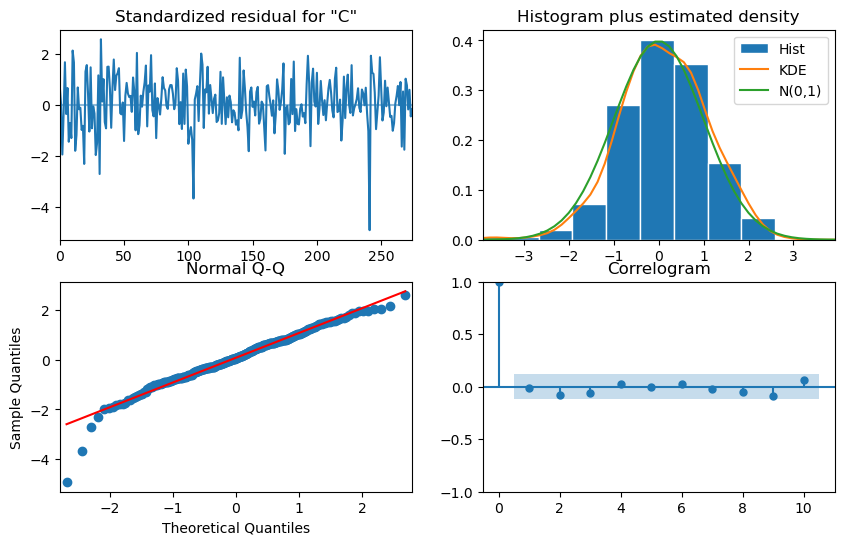

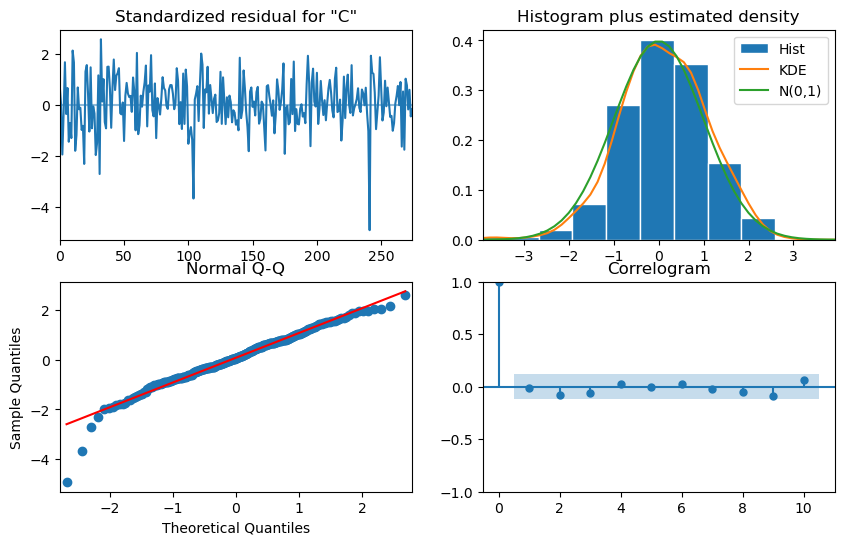

In [77]:
#===============================================================================================================================
# ARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
model_fit.plot_diagnostics(figsize=(10,6))

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not constant (discrepancy to white noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => Residuals’ distribution close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => White Noise.
#
#-------------------------------------------------------------------------------------------------------------------------------

In [78]:
#===============================================================================================================================
# ARIMA: LOG - RESIDUALS - Ljung-Box test (10 lags)
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
residuals = model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))    
#print(pvalue)

#-------------------------------------------------------------------------------------------------------------------------------
# Ljung-Box test
#-------------------------------------------------------------------------------------------------------------------------------
#       lb_stat  lb_pvalue
# --  ---------  ---------
# 11   0.274918        1.0
#-------------------------------------------------------------------------------------------------------------------------------
#
# pvalue > 0.05 => Residuals Not Correlated
#
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => MODEL can be used to Forecast *****
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
11,0.274918,1.0


In [79]:
#===============================================================================================================================
# ARIMA: LOG - RESULTS
#===============================================================================================================================
ARIMA_pred = model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_ARIMALn'] = 0
dfln['pred_ARIMALn'] = ARIMA_pred
dfln.loc[testini:,'pred_ARIMALn'].to_excel('Data/Output/Rolling-Ln-Monthly-ARIMALn.xlsx')
dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn,pred_ARMALn,pred_ARIMALn
275,2022-12-29,109734.60,11.605820,-0.024764,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
276,2023-01-31,113430.54,11.638946,0.033126,11.605820,10.732902,11.610645,11.602919,11.606656,11.607800
277,2023-02-28,104931.93,11.561067,-0.077879,11.638946,10.736173,11.648063,11.642805,11.646236,11.614927
278,2023-03-31,101882.20,11.531573,-0.029495,11.561067,10.739140,11.567604,11.552141,11.559829,11.612224
279,2023-04-28,104431.63,11.556288,0.024715,11.531573,10.741981,11.520429,11.528159,11.522971,11.605360
280,2023-05-31,108335.07,11.592984,0.036696,11.556288,10.744889,11.553166,11.559134,11.555436,11.606960
281,2023-06-30,118087.00,11.679177,0.086193,11.592984,10.747907,11.592800,11.597231,11.609757,11.613442
282,2023-07-31,121942.98,11.711309,0.032132,11.679177,10.751209,11.691326,11.689332,11.694393,11.612803
283,2023-08-31,115741.81,11.659117,-0.052192,11.711309,10.754602,11.718385,11.715136,11.723202,11.606793
284,2023-09-29,116565.17,11.666206,0.007089,11.659117,10.757787,11.641320,11.652965,11.645983,11.606612


In [80]:
#===============================================================================================================================
# ARIMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])
mse_ARIMA  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last) ,8))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8 ))  , "{:,}".format(round(sqrt(mse_Mean) ,8))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)   ,8))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)   ,8))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA) ,8))] ,
                ['ARIMA' , "{:,}".format(round(mse_ARIMA,8))  , "{:,}".format(round(sqrt(mse_ARIMA),8))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE        RMSE
#--------------------------------
# 0  Last  0.00323479  0.05687522
# 1  Mean  0.81434572  0.90241106
# 2  MA    0.00319756  0.05654699
# 3  AR    0.00317437  0.05634156
# 4  ARMA  0.00299064  0.05468671
# 5  ARIMA 0.00779214  0.08827310
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.00323479,0.05687522
1,Mean,0.81434572,0.90241106
2,MA,0.00319756,0.05654699
3,AR,0.00317437,0.05634156
4,ARMA,0.00299064,0.05468671
5,ARIMA,0.00779214,0.0882731


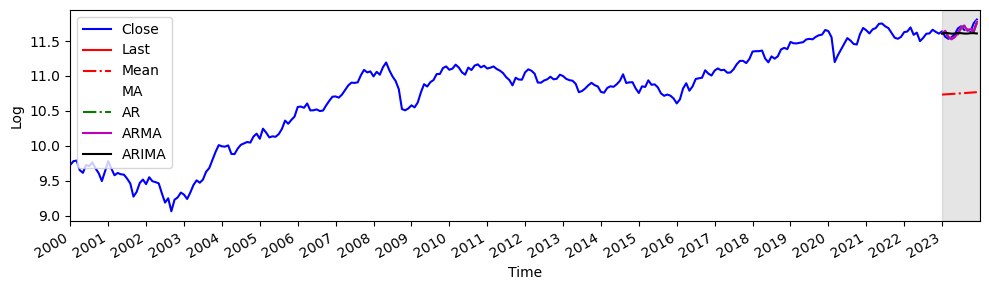

In [81]:
#===============================================================================================================================
# ARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln['CloseLn'], 'b-', label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn'] , 'r-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'] , 'r-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']   , 'w-' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']   , 'g-.', label='AR') 
ax.plot(dfln.loc[testini:,'pred_ARMALn'] , 'm-' , label='ARMA')
ax.plot(dfln.loc[testini:,'pred_ARIMALn'], 'k-' , label='ARIMA')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


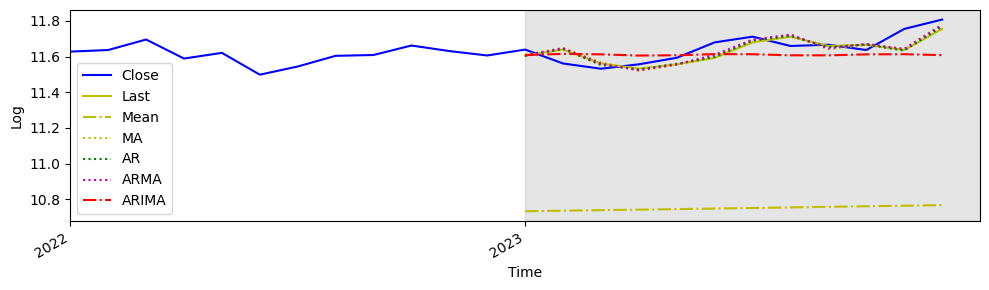

In [82]:
#===============================================================================================================================
# ARIMA: Log - Plot (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']   , 'b-' , label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn'] , 'y-' , label='Last')
ax.plot(dfln.loc[testini:,'pred_MeanLn'] , 'y-.', label='Mean')
ax.plot(dfln.loc[testini:,'pred_MALn']   , 'y:' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']   , 'g:' , label='AR')
ax.plot(dfln.loc[testini:,'pred_ARMALn'] , 'm:' , label='ARMA')
ax.plot(dfln.loc[testini:,'pred_ARIMALn'], 'r-.', label='ARIMA')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [83]:
################################################################################################################################
#
# SARIMA
#
################################################################################################################################

In [88]:
totallen

288

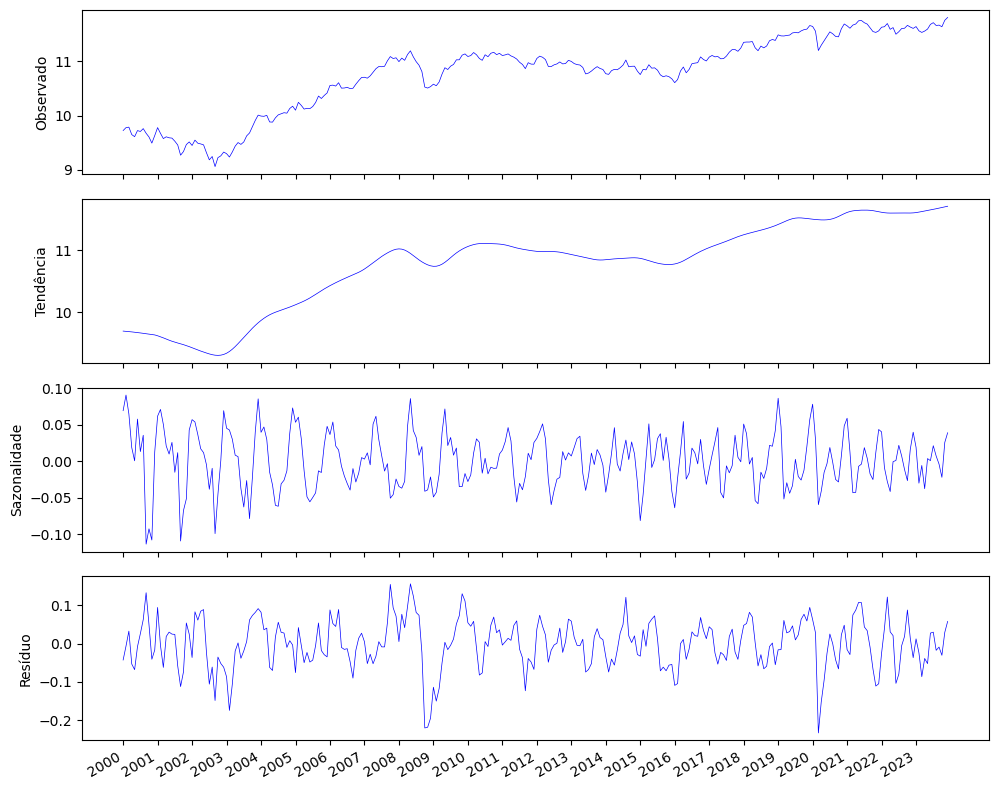

In [98]:
#===============================================================================================================================
# SARIMA: LOG - DECOMPOSITION
#===============================================================================================================================
from statsmodels.tsa.seasonal import STL
decomposition = STL(dfln['CloseLn'], period=12).fit()  

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))   
ax1.plot(decomposition.observed, color='b', lw=0.5)
ax1.set_ylabel('Observado')
ax2.plot(decomposition.trend, color='b', lw=0.5)
ax2.set_ylabel('Tendência')
ax3.plot(decomposition.seasonal, color='b', lw=0.5)
ax3.set_ylabel('Sazonalidade')
ax4.plot(decomposition.resid, color='b', lw=0.5)
ax4.set_ylabel('Resíduo')
plt.xticks(np.arange(0, totallen, 12), np.arange(2000, 2024, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [85]:
#===============================================================================================================================
# SARIMA: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ad_fuller_result = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ad_fuller_result[0],2)}')
print(f'ADF p-value  : {np.round(ad_fuller_result[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -0.92
# ADF p-value  :  0.78
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON-STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -0.92
ADF p-value  : 0.78


In [86]:
#===============================================================================================================================
# SARIMA: FUNCTION - optimize_SARIMA
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:   
    
    results = []
    
    for order in tqdm_notebook(order_list):   
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
    
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df 


In [87]:
#===============================================================================================================================
# SARIMA: PARAMETERS p, d, q ; P, Q, D
#===============================================================================================================================
from itertools import product

ps = range(0,  6, 1)   
qs = range(0, 10, 1)   

#ps = range(0, 7, 1)
#qs = range(0, 8, 1)
Ps = [0]
Qs = [0]
d = 1
D = 0
s = 12

order_list = list(product(ps, qs, Ps, Qs))
len(order_list)

60

In [88]:
#===============================================================================================================================
# SARIMA: LOG - AIC - optimize_SARIMA()
#===============================================================================================================================
result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 100% 60/60 [00:25<00:00, 1.14it/s]
#-------------------------------------------------------------------------------------------------------------------------------

#------------------------------
#    (p, q, P, Q)          AIC
#------------------------------
# 0  (2, 3, 0, 0)  -666.501519
# 1  (0, 1, 0, 0)  -665.304534
# 2  (1, 0, 0, 0)  -664.801098
# 3  (2, 0, 0, 0)  -664.103639
# 4  (0, 2, 0, 0)  -663.913691
# 5  (1, 1, 0, 0)  -663.689888
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\AppData\Local\Temp\ipykernel_11724\3843987759.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/60 [00:00<?, ?it/s]

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\tsa\states

,"(p,q,P,Q)",AIC
0,"(2, 3, 0, 0)",-666.501519
1,"(0, 1, 0, 0)",-665.304534
2,"(1, 0, 0, 0)",-664.801098
3,"(2, 0, 0, 0)",-664.103639
4,"(0, 2, 0, 0)",-663.913691
5,"(1, 1, 0, 0)",-663.689888
6,"(5, 9, 0, 0)",-663.151791
7,"(0, 0, 0, 0)",-663.009846
8,"(2, 5, 0, 0)",-662.823161
9,"(0, 3, 0, 0)",-662.186863


In [89]:
#===============================================================================================================================
# SARIMA: LOG - FORECAST
#===============================================================================================================================
ARIMA_model = SARIMAX(trainln, order=(2,1,3), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
#===============================================================================================================================
# SARIMA: LOG - SUMMARY
#===============================================================================================================================
print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                CloseLn   No. Observations:                  276
Model:               SARIMAX(2, 1, 3)   Log Likelihood                 339.251
Date:                Sun, 26 May 2024   AIC                           -666.502
Time:                        23:41:22   BIC                           -644.801
Sample:                             0   HQIC                          -657.792
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1273      0.041      3.106      0.002       0.047       0.208
ar.L2         -0.9148      0.038    -24.260      0.000      -0.989      -0.841
ma.L1          0.0043      0.066      0.065      0.9

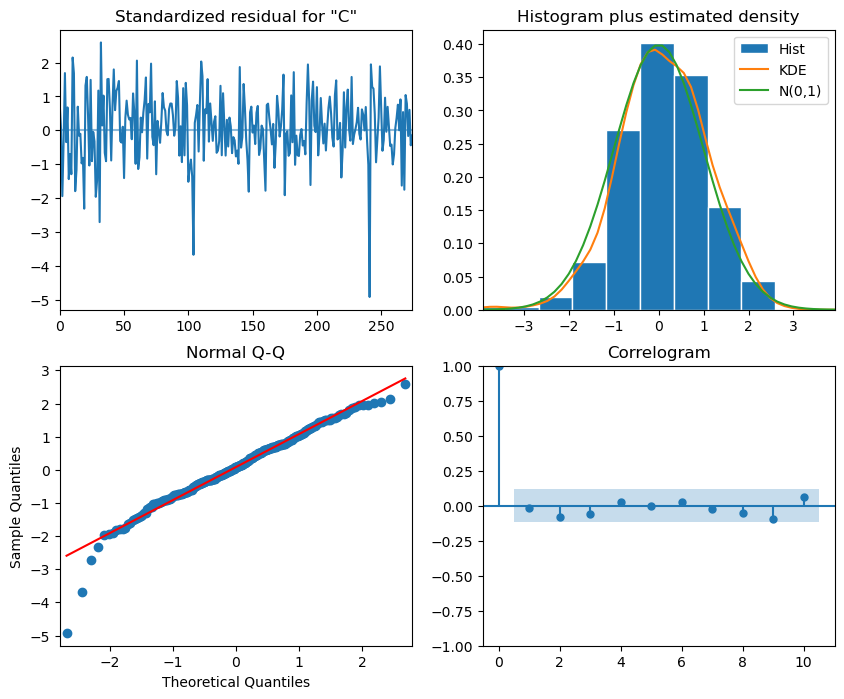

In [91]:
#===============================================================================================================================
# SARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => white noise.
#
# ***** WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [92]:
#===============================================================================================================================
# SARIMA: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
#residuals = model_fit.resid
residuals = ARIMA_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#
#--------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11   0.274918       1.0
#
#-------------------------------------------------------------------------------------------------------------------------------
#
# LJUNG-BOX test: pvalue > 0.05 => Residuals are Not Correlated.
#
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => model can be used to Forecast *****
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
11,0.274918,1.0


In [93]:
#===============================================================================================================================
# SARIMA: LOG - RESULTS
#===============================================================================================================================
SARIMA_pred = ARIMA_model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_SARIMALn'] = SARIMA_pred  
dfln.loc[testini:,'pred_SARIMALn'].to_excel('Data/Output/Rolling-Ln-Monthly-SARIMALn.xlsx')
dfln.loc[testini:, ['Date','CloseLn', 'pred_ARIMALn', 'pred_SARIMALn']]
#dfln.loc[testini-1:]

,Date,CloseLn,pred_ARIMALn,pred_SARIMALn
276,2023-01-31,11.638946,11.607800,11.607800
277,2023-02-28,11.561067,11.614927,11.614927
278,2023-03-31,11.531573,11.612224,11.612224
279,2023-04-28,11.556288,11.605360,11.605360
280,2023-05-31,11.592984,11.606960,11.606960
281,2023-06-30,11.679177,11.613442,11.613442
282,2023-07-31,11.711309,11.612803,11.612803
283,2023-08-31,11.659117,11.606793,11.606793
284,2023-09-29,11.666206,11.606612,11.606612
285,2023-10-31,11.636414,11.612087,11.612087


In [94]:
#===============================================================================================================================
# SARIMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'  ])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'  ])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'    ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'    ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'  ])
mse_ARIMA  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn' ])
mse_SARIMA = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last)  ,8))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8 ))  , "{:,}".format(round(sqrt(mse_Mean)  ,8))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)    ,8))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)    ,8))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA)  ,8))] ,
                ['ARIMA' , "{:,}".format(round(mse_ARIMA,8))  , "{:,}".format(round(sqrt(mse_ARIMA) ,8))] ,
                ['SARIMA', "{:,}".format(round(mse_SARIMA,8)) , "{:,}".format(round(sqrt(mse_SARIMA),8))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE        RMSE
#--------------------------------
# 0  Last  0.00323479  0.05687522
# 1  Mean  0.81434572  0.90241106
# 2  MA    0.00319756  0.05654699
# 3  AR    0.00317437  0.05634156
# 4  ARMA  0.00299064  0.05468671
# 5  ARIMA 0.00779214  0.08827310
# 6 SARIMA 0.00779214  0.08827310
#-------------------------------------------------------------------------------------------------------------------------------


,Log,MSE,RMSE
0,Last,0.00323479,0.05687522
1,Mean,0.81434572,0.90241106
2,MA,0.00319756,0.05654699
3,AR,0.00317437,0.05634156
4,ARMA,0.00299064,0.05468671
5,ARIMA,0.00779214,0.0882731
6,SARIMA,0.00779214,0.0882731


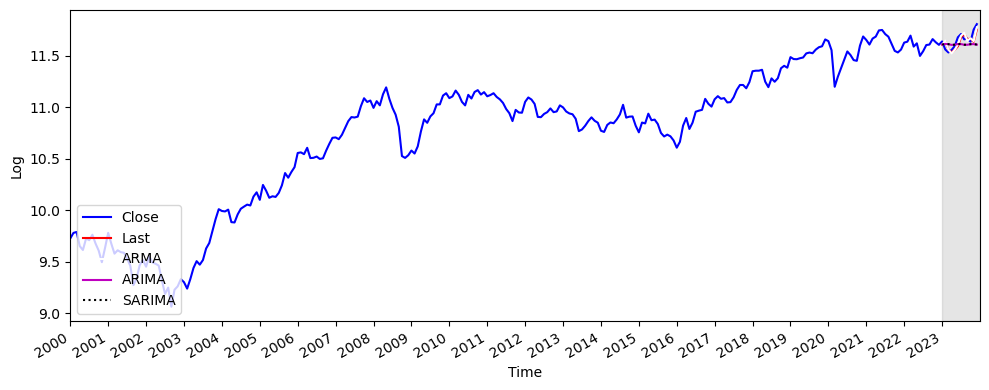

In [95]:
#===============================================================================================================================
# SARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[:,'CloseLn']             , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']  , 'r-', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']  , 'w-', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn'] , 'm-', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMALn'], 'k:', label='SARIMA')   
ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

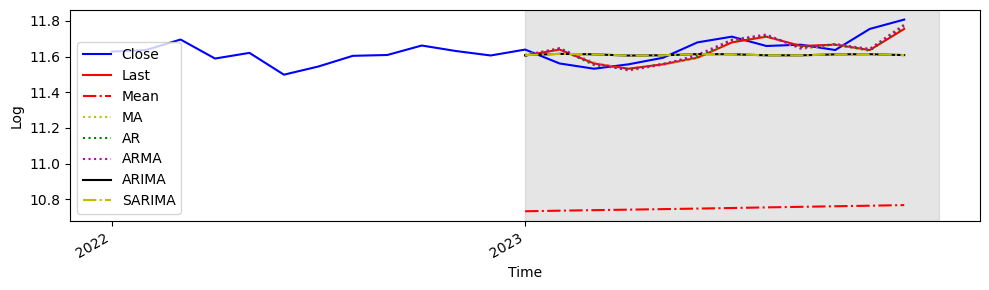

In [96]:
#===============================================================================================================================
# SARIMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'] , 'b-' , label='Close' )
ax.plot(dfln.loc[testini:,'pred_LastLn']     , 'r-' , label='Last'  )
ax.plot(dfln.loc[testini:,'pred_MeanLn']     , 'r-.', label='Mean'  )
ax.plot(dfln.loc[testini:,'pred_MALn']       , 'y:' , label='MA'    )
ax.plot(dfln.loc[testini:,'pred_ARLn']       , 'g:' , label='AR'    )
ax.plot(dfln.loc[testini:,'pred_ARMALn']     , 'm:' , label='ARMA'  )
ax.plot(dfln.loc[testini:,'pred_ARIMALn']    , 'k-' , label='ARIMA' )
ax.plot(dfln.loc[testini:,'pred_SARIMALn']   , 'y-.', label='SARIMA')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [97]:
################################################################################################################################
#
# SARIMA SEASONAL
#
################################################################################################################################


In [98]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ADF_SARIMAS = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ADF_SARIMAS[0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -0.92
# ADF p-value  :  0.78
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON-STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -0.92
ADF p-value  : 0.78


In [99]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG-DIFF - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ADF_SARIMAS = adfuller(dfln['CloseLnDiff'])
print(f'ADF Statistic: {np.round(ADF_SARIMAS [0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS [1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -15,12
# ADF p-value  : 0.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -15.12
ADF p-value  : 0.0


In [100]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG-DIFF-SEASONAL - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
dflndiffseasonal = dfln['CloseLn'].diff(periods=12)
ADF_SARIMAS = adfuller(dflndiffseasonal[12:])
print(f'ADF Statistic: {np.round(ADF_SARIMAS[0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -3.33
# ADF p-value  : 0.01
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------
dflndiffseasonal

ADF Statistic: -3.33
ADF p-value  : 0.01


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
283    0.055228
284    0.057636
285   -0.025251
286    0.123962
287    0.201157
Name: CloseLn, Length: 288, dtype: float64

In [101]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - TRAIN SET
#===============================================================================================================================
trainln

0       9.725221
1       9.779069
2       9.788097
3       9.651018
4       9.612909
         ...    
271    11.603889
272    11.608570
273    11.661665
274    11.630584
275    11.605820
Name: CloseLn, Length: 276, dtype: float64

In [102]:
#===============================================================================================================================
# SARIMA SEASONAL: PARAMETERS p, d, q ; P, Q, D
#===============================================================================================================================
ps = range(0, 3, 1)    
qs = range(0, 4, 1)
Ps = range(0, 3, 1)
Qs = range(0, 3, 1)

d = 1
D = 1
s = 12
order_list = list(product(ps, qs, Ps, Qs))
print(len(order_list))

108


In [103]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - AIC optimize_SARIMA()
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 100% 48/48 [36:39<00:00, 111.83s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#    (p, q, P, Q)           AIC
#-------------------------------
# 0  (0, 1, 0, 1)  -594.966785
# 1  (1, 0, 0, 1)  -594.439586
# 2  (2, 0, 0, 1)  -594.028783
# 3  (0, 1, 0, 2)  -593.933307
# 4  (0, 2, 0, 1)  -593.807355
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\AppData\Local\Temp\ipykernel_11724\3843987759.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/108 [00:00<?, ?it/s]

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

,"(p,q,P,Q)",AIC
0,"(0, 1, 0, 1)",-594.966785
1,"(1, 0, 0, 1)",-594.439586
2,"(2, 0, 0, 1)",-594.028783
3,"(0, 1, 0, 2)",-593.933307
4,"(0, 2, 0, 1)",-593.807355
...,...,...
103,"(1, 2, 0, 0)",-468.773511
104,"(0, 0, 0, 0)",-468.546335
105,"(1, 3, 0, 0)",-467.454779
106,"(2, 2, 0, 0)",-466.751297


In [104]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================
SARIMA_model = SARIMAX(trainln, order=(0,1,1), seasonal_order=(0,1,1,s), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)


In [105]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - SUMMARY
#===============================================================================================================================
print(SARIMA_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            CloseLn   No. Observations:                  276
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 300.483
Date:                            Sun, 26 May 2024   AIC                           -594.967
Time:                                    23:45:43   BIC                           -584.250
Sample:                                         0   HQIC                          -590.660
                                            - 276                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1285      0.061      2.117      0.034       0.010       0.248
ma.S.L12      -0.9936      0.737   

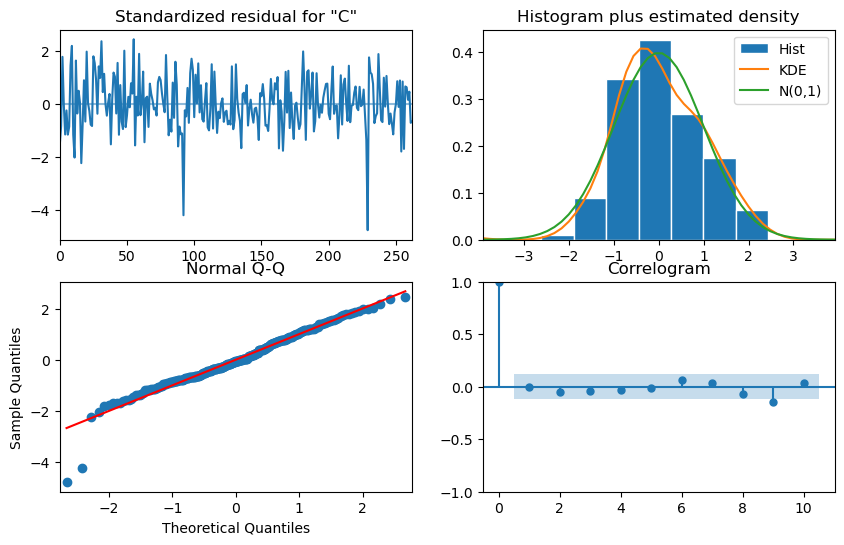

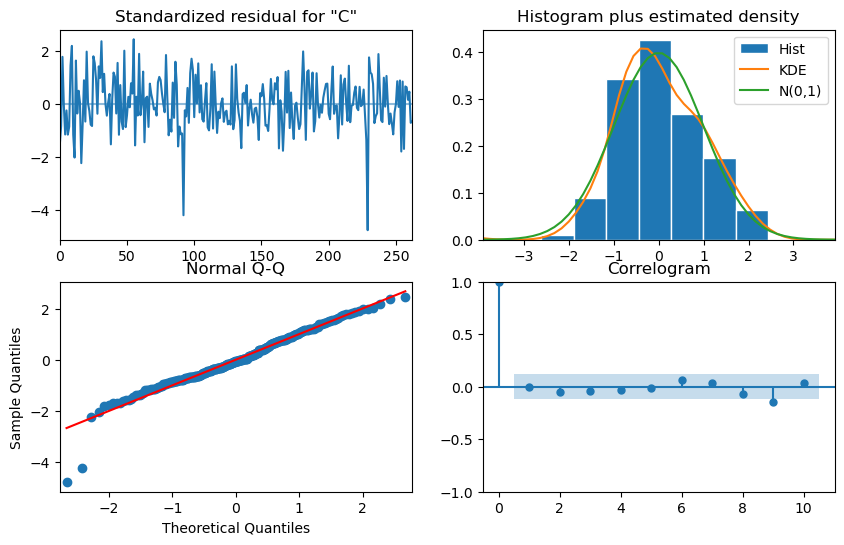

In [106]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - DIAGNOSTICS
#===============================================================================================================================
SARIMA_model_fit.plot_diagnostics(figsize=(10,6))


In [107]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
residuals = SARIMA_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[20], return_df=True)

#-------------------------------------------------------------------------------------------------------------------------------
#      lb_stat  lb_pvalue
#------------------------
# 20  42.541663  0.002349
#
#-------------------------------------------------------------------------------------------------------------------------------
# p-values << 0.78 => Null Hypothesis Rejected => Residuals Not Independent, Residuals Correlated
#-------------------------------------------------------------------------------------------------------------------------------
# ****** NO WHITE NOISE RESIDUALS ******
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
20,42.046653,0.002727


In [108]:
SARIMA_model_fit.get_prediction(testini, totallen).predicted_mean

276    11.606992
277    11.616259
278    11.614094
279    11.626270
280    11.614935
281    11.604865
282    11.619887
283    11.629768
284    11.618086
285    11.637601
286    11.652774
287    11.681733
288    11.688977
Name: predicted_mean, dtype: float64

In [109]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================
SARIMAS_pred = SARIMA_model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_SARIMASLn'] = SARIMAS_pred
dfln.loc[testini:,'pred_SARIMASLn'].to_excel('Data/Output/Rolling-Ln-Monthly-SARIMASLn.xlsx')
dfln.loc[testini-1:, ['Date', 'CloseLn', 'pred_ARIMALn', 'pred_SARIMALn' , 'pred_SARIMASLn']]


,Date,CloseLn,pred_ARIMALn,pred_SARIMALn,pred_SARIMASLn
275,2022-12-29,11.605820,NaN,NaN,NaN
276,2023-01-31,11.638946,11.607800,11.607800,11.606992
277,2023-02-28,11.561067,11.614927,11.614927,11.616259
278,2023-03-31,11.531573,11.612224,11.612224,11.614094
279,2023-04-28,11.556288,11.605360,11.605360,11.626270
280,2023-05-31,11.592984,11.606960,11.606960,11.614935
281,2023-06-30,11.679177,11.613442,11.613442,11.604865
282,2023-07-31,11.711309,11.612803,11.612803,11.619887
283,2023-08-31,11.659117,11.606793,11.606793,11.629768
284,2023-09-29,11.666206,11.606612,11.606612,11.618086


In [110]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'    ])
mse_Mean     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'    ])
mse_MA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'      ])
mse_AR       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'      ])
mse_ARMA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'    ])
mse_ARIMA    = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'   ])
mse_SARIMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'  ])
mse_SARIMAS  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn' ])

data_metrics = [['Last'    , "{:,}".format(round(mse_Last  ,6))  , "{:,}".format(round(sqrt(mse_Last)    ,6))] ,
                ['Mean'    , "{:,}".format(round(mse_Mean  ,6))  , "{:,}".format(round(sqrt(mse_Mean)    ,6))] ,
                ['MA'      , "{:,}".format(round(mse_MA    ,6))  , "{:,}".format(round(sqrt(mse_MA)      ,6))] ,
                ['AR'      , "{:,}".format(round(mse_AR    ,6))  , "{:,}".format(round(sqrt(mse_AR)      ,6))] ,
                ['ARMA'    , "{:,}".format(round(mse_ARMA  ,6))  , "{:,}".format(round(sqrt(mse_ARMA)    ,6))] ,
                ['ARIMA'   , "{:,}".format(round(mse_ARIMA ,6))  , "{:,}".format(round(sqrt(mse_ARIMA)   ,6))] ,
                ['SARIMA'  , "{:,}".format(round(mse_SARIMA,6))  , "{:,}".format(round(sqrt(mse_SARIMA)  ,6))] ,
                ['SARIMAS' , "{:,}".format(round(mse_SARIMAS,6)) , "{:,}".format(round(sqrt(mse_SARIMAS),6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])

#row_new = {'Model':'ARIMA', 'MSE':round(mse_ARIMA,4), 'RMSE':round(sqrt(mse_ARIMA),4) }
#data_metrics = data_metrics.append(row_new, ignore_index=True)

df_metrics
#-------------------------------------------------------------------------------------------------------------------------------
#  Model           MSE      RMSE
#-------------------------------------------------------------------------------------------------------------------------------
# 0  Last     0.003235  0.056875
# 1  Mean     0.814346  0.902411
# 2  MA       0.003198  0.056547
# 3  AR       0.003174  0.056342
# 4  ARMA     0.002991  0.054687
# 5  ARIMA    0.007792  0.088273
# 6  SARIMA   0.007792  0.088273
# 7  SARIMAS  0.005162  0.071848
#-------------------------------------------------------------------------------------------------------------------------------

,Model,MSE,RMSE
0,Last,0.003235,0.056875
1,Mean,0.814346,0.902411
2,MA,0.003198,0.056547
3,AR,0.003174,0.056342
4,ARMA,0.002991,0.054687
5,ARIMA,0.007792,0.088273
6,SARIMA,0.007792,0.088273
7,SARIMAS,0.004947,0.070332


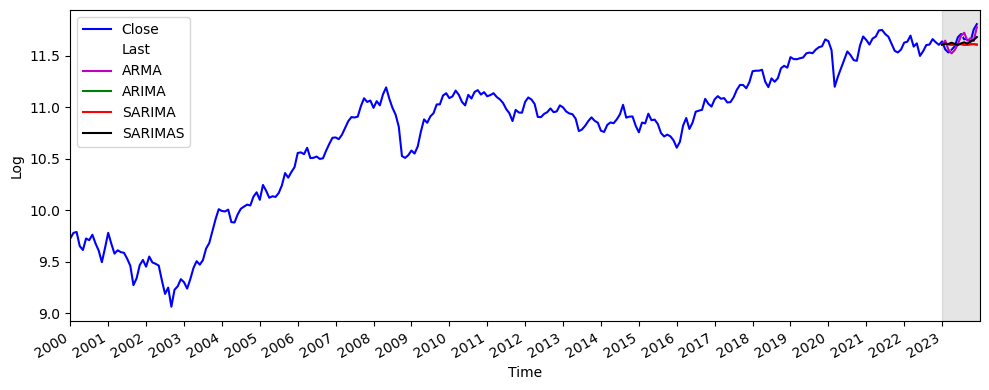

In [111]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[ :      ,'CloseLn']        , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'w-', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'm-', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'g-', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMALn']  , 'r-', label='SARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'k-', label='SARIMAS')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

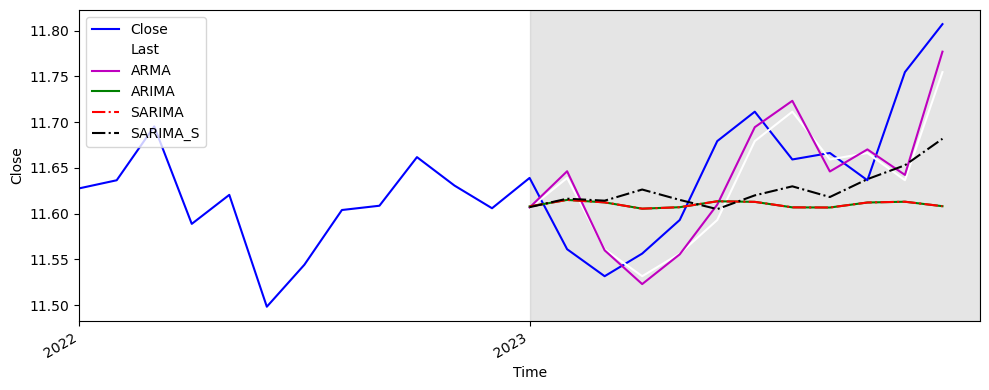

In [112]:
#===============================================================================================================================
# SARIMA SEASONAL: PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']  , 'b-', label='Close')    
ax.plot(dfln.loc[testini:  ,'pred_LastLn']    , 'w-', label='Last')
ax.plot(dfln.loc[testini:  ,'pred_ARMALn']    , 'm-', label='ARMA')   
ax.plot(dfln.loc[testini:  ,'pred_ARIMALn']   , 'g-', label='ARIMA')   
ax.plot(dfln.loc[testini:  ,'pred_SARIMALn']  , 'r-.', label='SARIMA')   
ax.plot(dfln.loc[testini:  ,'pred_SARIMASLn'] , 'k-.', label='SARIMA_S')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([ testini-testlen, testini ], [ 2022           , 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [113]:
################################################################################################################################
################################################################################################################################
#
# ROLLING ARIMA
#
################################################################################################################################
################################################################################################################################


In [114]:
#===============================================================================================================================
# ROLLING ARIMA: LIBRARIES
#===============================================================================================================================
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

#===============================================================================================================================
# ROLLING ARIMA: LOG - LISTS
#===============================================================================================================================
CloseList = dfln['CloseLn'].values
CloseTrain, CloseTest = CloseList[0:trainlen], CloseList[testini:]
HistTrain = [x for x in CloseTrain]
PredTest = list()

In [115]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - AUTOARIMA - AIC
#===============================================================================================================================
import pandas as pd
import pmdarima as pmd

results = pmd.auto_arima(dfln['CloseLn'],
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=12,   # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=12,   # max guess for MA(q)
                         trend='c',
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# AIC
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-697.580, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-699.010, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-699.538, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-697.580, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-698.057, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-698.458, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-696.938, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-699.538, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.896 seconds


In [116]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - AUTOARIMA - BIC
#===============================================================================================================================
results = pmd.auto_arima(dfln['CloseLn'],
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=12,    # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=12,    # max guess for MA(q)
                         trend='c',
                         information_criterion='bic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# BIC
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=-690.261, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=-688.031, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=-688.560, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=-690.261, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=-683.419, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.355 seconds


In [117]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - FORECAST (AIC)
#===============================================================================================================================
for t in range(testlen):
    
    ARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,1), simple_differencing=False)
    ARIMA_ROLL_model_fit = ARIMA_ROLL_model.fit(disp=False)

    output = ARIMA_ROLL_model_fit.forecast()
    yhat = output[0]
    PredTest.append(yhat)
    yobs = CloseTest[t]
    HistTrain.append(yobs)
    print('t = %d, Observed = %f, Forecast = %f' % (t, yobs, yhat))
    dfln.loc[trainlen+t,'pred_ARIMARLn'] = yhat
    

t = 0, Observed = 11.638946, Forecast = 11.603219
t = 1, Observed = 11.561067, Forecast = 11.643639
t = 2, Observed = 11.531573, Forecast = 11.550425
t = 3, Observed = 11.556288, Forecast = 11.529131
t = 4, Observed = 11.592984, Forecast = 11.559821
t = 5, Observed = 11.679177, Forecast = 11.597320
t = 6, Observed = 11.711309, Forecast = 11.690028
t = 7, Observed = 11.659117, Forecast = 11.714145
t = 8, Observed = 11.666206, Forecast = 11.651774
t = 9, Observed = 11.636414, Forecast = 11.668118
t = 10, Observed = 11.754546, Forecast = 11.632220
t = 11, Observed = 11.806977, Forecast = 11.770331


In [118]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - RESULTS
#===============================================================================================================================
#dfln.drop('pred_RARIMA', axis=1, inplace=True)
#dfln.rename(columns={"pred_RARIMALn": "pred_ARIMARLn"}, inplace=True)
dfln.loc[testini:,'pred_ARIMARLn'].to_excel('Data/Output/Rolling-Ln-Monthly-ARIMARLn(0,1,1).xlsx')

dfln.loc[testini-1:,['Date','Close', 'pred_ARIMALn', 'pred_SARIMALn','pred_ARIMARLn']]


,Date,Close,pred_ARIMALn,pred_SARIMALn,pred_ARIMARLn
275,2022-12-29,109734.60,NaN,NaN,NaN
276,2023-01-31,113430.54,11.607800,11.607800,11.603219
277,2023-02-28,104931.93,11.614927,11.614927,11.643639
278,2023-03-31,101882.20,11.612224,11.612224,11.550425
279,2023-04-28,104431.63,11.605360,11.605360,11.529131
280,2023-05-31,108335.07,11.606960,11.606960,11.559821
281,2023-06-30,118087.00,11.613442,11.613442,11.597320
282,2023-07-31,121942.98,11.612803,11.612803,11.690028
283,2023-08-31,115741.81,11.606793,11.606793,11.714145
284,2023-09-29,116565.17,11.606612,11.606612,11.651774


In [119]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'      ])
mse_Mean        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'      ])
mse_MA          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'        ])
mse_AR          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'        ])
mse_ARMA        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'      ])
mse_ARIMA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'     ])
mse_SARIMA      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'    ])
mse_SARIMAS     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn'   ])
mse_ARIMAR      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMARLn'    ])

data_metrics = [['Last'       , "{:,}".format(round(mse_Last     ,6)), "{:,}".format(round(sqrt(mse_Last)   ,6))] ,
                ['Mean'       , "{:,}".format(round(mse_Mean     ,6)), "{:,}".format(round(sqrt(mse_Mean)   ,6))] ,
                ['MA'         , "{:,}".format(round(mse_MA       ,6)), "{:,}".format(round(sqrt(mse_MA)     ,6))] ,
                ['AR'         , "{:,}".format(round(mse_AR       ,6)), "{:,}".format(round(sqrt(mse_AR)     ,6))] ,
                ['ARMA'       , "{:,}".format(round(mse_ARMA     ,6)), "{:,}".format(round(sqrt(mse_ARMA)   ,6))] ,
                ['ARIMA'      , "{:,}".format(round(mse_ARIMA    ,6)), "{:,}".format(round(sqrt(mse_ARIMA)  ,6))] ,
                ['SARIMA'     , "{:,}".format(round(mse_SARIMA   ,6)), "{:,}".format(round(sqrt(mse_SARIMA) ,6))] ,
                ['SARIMAS'    , "{:,}".format(round(mse_SARIMAS  ,6)), "{:,}".format(round(sqrt(mse_SARIMAS),6))] ,
                ['RARIMA'     , "{:,}".format(round(mse_ARIMAR   ,6)), "{:,}".format(round(sqrt(mse_ARIMAR) ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])
df_metrics

#rmse = sqrt(mean_squared_error(CloseTest, PredTest))
#print('Test RMSE: %.3f' % rmse)

#-------------------------------------------------------------------------------------------------------------------------------
#    Model        MSE      RMSE
#------------------------------
# 0  Last     0.003235  0.056875
# 1  Mean     0.814346  0.902411
# 2  MA       0.003198  0.056547
# 3  AR       0.003174  0.056342
# 4  ARMA     0.002991  0.054687
# 5  ARIMA    0.007792  0.088273
# 6  SARIMA   0.007792  0.088273
# 7  SARIMAS  0.007411  0.071848
# 8  RARIMA   0.003166  0.056265
#-------------------------------------------------------------------------------------------------------------------------------

,Model,MSE,RMSE
0,Last,0.003235,0.056875
1,Mean,0.814346,0.902411
2,MA,0.003198,0.056547
3,AR,0.003174,0.056342
4,ARMA,0.002991,0.054687
5,ARIMA,0.007792,0.088273
6,SARIMA,0.007792,0.088273
7,SARIMAS,0.004947,0.070332
8,RARIMA,0.003166,0.056265


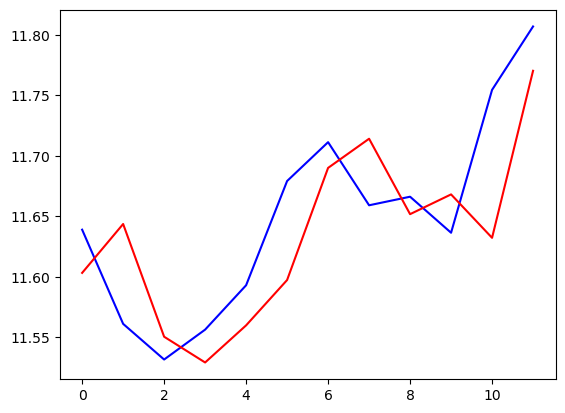

In [120]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT
#===============================================================================================================================
pyplot.plot(CloseTest, color='blue')
pyplot.plot(PredTest, color='red')
pyplot.show()


In [121]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - SUMMARY
#===============================================================================================================================
print(ARIMA_ROLL_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  287
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 349.986
Date:                Sun, 26 May 2024   AIC                           -695.973
Time:                        23:45:47   BIC                           -688.661
Sample:                             0   HQIC                          -693.042
                                - 287                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1292      0.049      2.659      0.008       0.034       0.224
sigma2         0.0051      0.000     16.275      0.000       0.004       0.006
Ljung-Box (L1) (Q):                   0.05   Jarque-

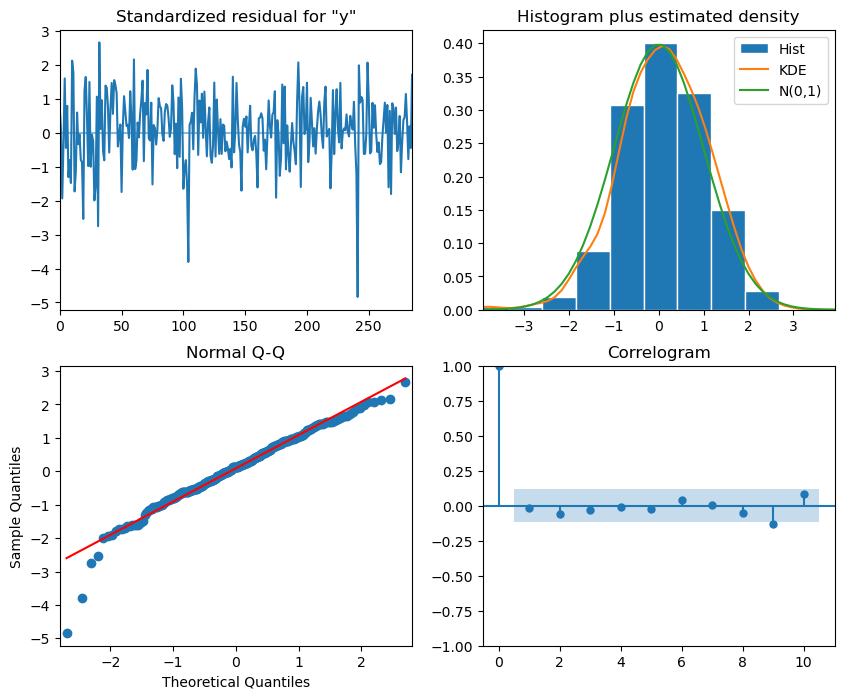

In [122]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
ARIMA_ROLL_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => white noise.
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [123]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

residuals = ARIMA_ROLL_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11    0.285218       1.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# LJUNG-BOX test: pvalue > 0.05 => Residuals NOT CORRELATED
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => Model can be used to FORECAST *****
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
11,0.285218,1.0


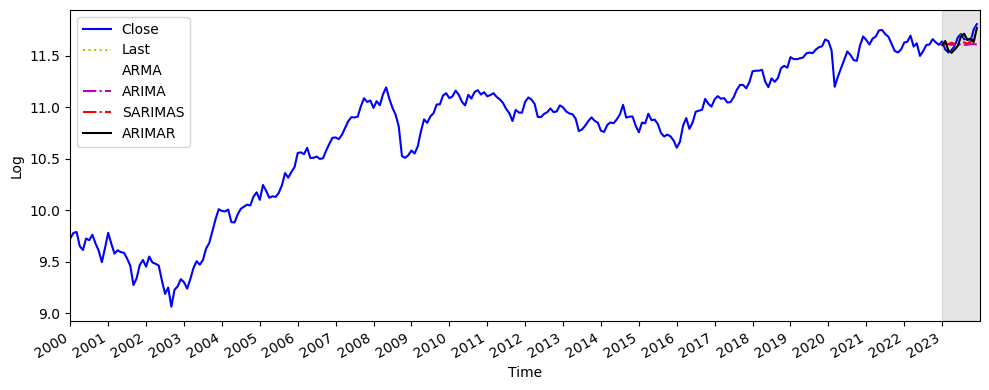

In [124]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[       :,'CloseLn']        , 'b-' , label='Close')
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'y:' , label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'w-.', label='ARMA')
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'm-.', label='ARIMA') 
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'r-.', label='SARIMAS')
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'k-' , label='ARIMAR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

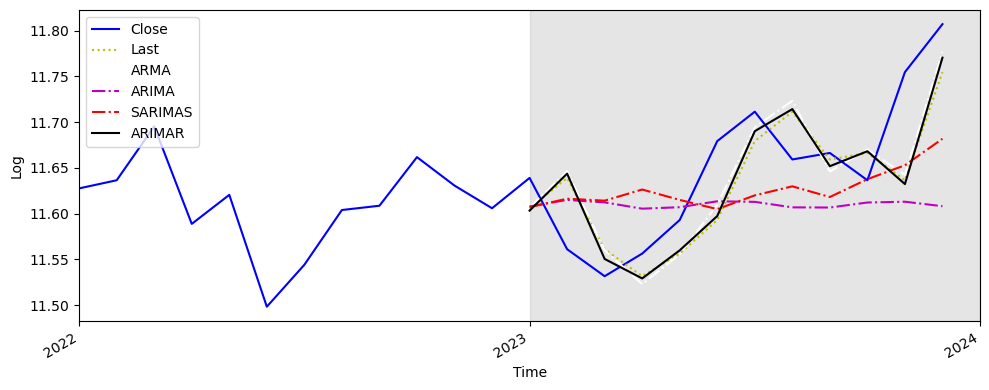

In [125]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'], 'b-' , label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'y:' , label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'w-.', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'm-.', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'r-.', label='SARIMAS')   
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'k-' , label='ARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([testini-testlen, testini, totallen ], [ 2022, 2023, 2024])

fig.autofmt_xdate()
plt.tight_layout()

In [126]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - RECOVER
#===============================================================================================================================
df['pred_ARIMAR'] = 0.0
df.loc[testini:,'pred_ARIMAR']= np.round(np.exp(dfln.loc[testini:,'pred_ARIMARLn']),2)
df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR,pred_ARMA,pred_ARIMAR
275,2022-12-29,109734.60,0.00,0.00,0.00,0.00,0.00,0.00
276,2023-01-31,113430.54,109734.60,55666.44,110265.40,109416.77,109826.35,109449.53
277,2023-02-28,104931.93,113430.54,55874.98,114469.41,113869.16,114260.51,113964.14
278,2023-03-31,101882.20,104931.93,56051.44,105620.11,103999.42,104802.10,103821.17
279,2023-04-28,104431.63,101882.20,56215.71,100753.16,101535.02,101009.61,101633.74
280,2023-05-31,108335.07,104431.63,56387.91,104106.16,104729.28,104342.70,104801.29
281,2023-06-30,118087.00,108335.07,56572.78,108315.10,108796.16,110167.46,108805.84
282,2023-07-31,121942.98,118087.00,56790.91,119530.44,119292.29,119897.53,119375.40
283,2023-08-31,115741.81,121942.98,57021.13,122808.97,122410.63,123401.96,122289.35
284,2023-09-29,116565.17,115741.81,57227.89,113700.10,115031.89,114231.53,114895.02


In [127]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'  ])
mse_Mean   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'  ])
mse_MA     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'    ])
mse_AR     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'    ])
mse_ARMA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'  ])
#mse_ARIMA  = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMA'])
#mse_SARIMAS= mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMAS'])
mse_ARIMAR = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARIMAR'])

data_metrics = [['Last'      , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last)   ,))] ,
                ['Mean'      , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean)   ,))] ,
                ['MA'        , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA)     ,))] ,
                ['AR'        , "{:,}".format(round(mse_AR,  ))  , "{:,}".format(round(sqrt(mse_AR)     ,))] ,
                ['ARMA'      , "{:,}".format(round(mse_ARMA,))  , "{:,}".format(round(sqrt(mse_ARMA)   ,))] ,
                ['ARIMAR'    , "{:,}".format(round(mse_ARIMAR,)), "{:,}".format(round(sqrt(mse_ARIMAR) ,))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Model            MSE   RMSE
#--------------------------------
# 0  Last      43,832,846  6,621
# 1  Mean   3,470,811,963 58,914
# 2  MA        42,313,143  6,505
# 3  AR        42,768,145  6,540
# 4  ARMA      40,083,807  6,331
# 5  ARIMAR    42,619,672  6,528
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,"43,832,846","6,621"
1,Mean,"3,470,811,963","58,914"
2,MA,"42,313,143","6,505"
3,AR,"42,768,145","6,540"
4,ARMA,"40,083,807","6,331"
5,ARIMAR,"42,619,672","6,528"


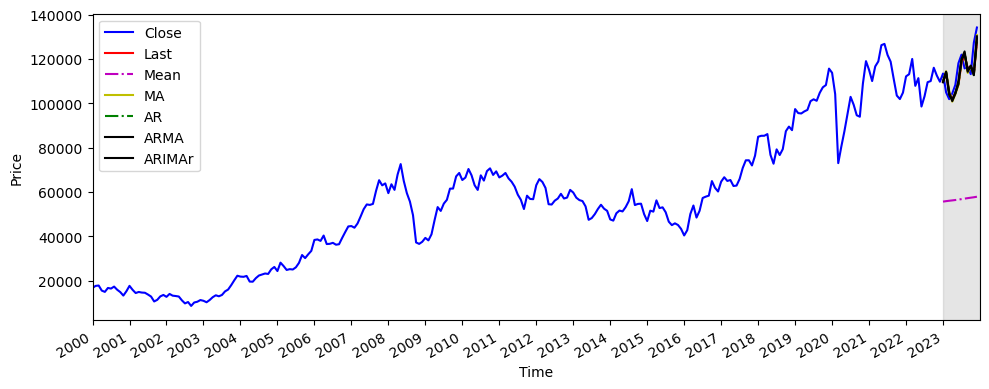

In [128]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini:,'pred_Last']   , 'r-' , label='Last')
ax.plot(df.loc[testini:,'pred_Mean']   , 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']     , 'y-' , label='MA')
ax.plot(df.loc[testini:,'pred_AR']     , 'g-.', label='AR')
ax.plot(df.loc[testini:,'pred_ARMA']   , 'k-' , label='ARMA')
ax.plot(df.loc[testini:,'pred_ARIMAR'] , 'k-' , label='ARIMAr')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

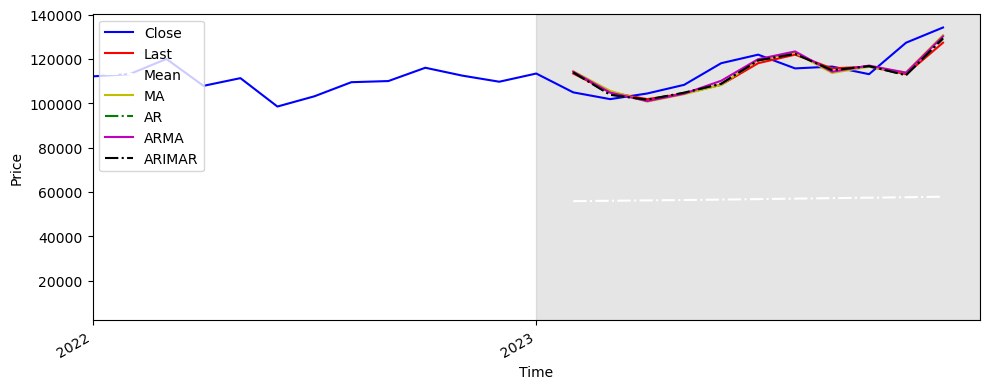

In [129]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-PERIOD:,'Close']    , 'b-' , label='Close')
ax.plot(df.loc[testini+1:  ,'pred_Last']   , 'r-' , label='Last')
ax.plot(df.loc[testini+1:  ,'pred_Mean']   , 'w-.', label='Mean')
ax.plot(df.loc[testini+1:  ,'pred_MA']     , 'y-' , label='MA')
ax.plot(df.loc[testini+1:  ,'pred_AR']     , 'g-.', label='AR')
ax.plot(df.loc[testini+1:  ,'pred_ARMA']   , 'm-' , label='ARMA')
ax.plot(df.loc[testini+1:  ,'pred_ARIMAR'] , 'k-.', label='ARIMAR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini], [2022, 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [130]:
################################################################################################################################
################################################################################################################################
#
# ROLLING ARIMA SEASONAL
#
################################################################################################################################
################################################################################################################################


In [131]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - AUTO_ARIMA - AIC
#===============================================================================================================================
import pandas as pd
import pmdarima as pmd

results = pmd.auto_arima(trainln,
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=15,    # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=15,    # max guess for MA(q)
                         m=12,        # seasonal order
                         start_P=0,  # initial guess for seasonal AR(P)
                         start_D=0,  # initial guess for seasonal I(D)
                         start_Q=0,  # initial guess for seasonal MA(Q)
                         trend='c',
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# p,d,q,m: 15,1,15,12
# Best model:  ARIMA(0,1,1)(0,0,0)[12] 
# AIC=-665.285
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-663.487, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-663.296, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-663.886, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-663.487, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-665.285, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-663.812, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-662.698, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-663.769, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-664.134, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-664.781, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-662.680, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=-665.285, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 2.498 seconds


In [132]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - AUTO_ARIMA - BIC
#===============================================================================================================================
results = pmd.auto_arima(trainln,
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=15,   # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=15,   # max guess for MA(q)
                         m=12,       # seasonal order
                         start_P=0,  # initial guess for seasonal AR(P)
                         start_D=0,  # initial guess for seasonal I(D)
                         start_Q=0,  # initial guess for seasonal MA(Q)
                         trend='c',
                         information_criterion='bic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[12] 
# BIC=-656.253
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : BIC=-656.253, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : BIC=-648.829, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : BIC=-649.419, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : BIC=-656.253, Time=0.06 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : BIC=-651.162, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : BIC=-651.235, Time=0.20 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : BIC=-646.107, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : BIC=-653.931, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : BIC=-654.435, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : BIC=-649.302, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.839 seconds


In [133]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: OPTIMIZE_SARIMA - AIC
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 
# d = 1
# D = 1
# s = 12
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 108/108 [05:29<00:00, 5.88s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#    (p, q, P, Q)          AIC
#------------------------------
# 0  (0, 1, 0, 1)  -594.966785
# 1  (1, 0, 0, 1)  -594.439586
# 2  (2, 0, 0, 1)  -594.028783
# 3  (0, 1, 0, 2)  -593.933307
# 4  (0, 2, 0, 1)  -593.807355
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\AppData\Local\Temp\ipykernel_11724\3843987759.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/108 [00:00<?, ?it/s]

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

,"(p,q,P,Q)",AIC
0,"(0, 1, 0, 1)",-594.966785
1,"(1, 0, 0, 1)",-594.439586
2,"(2, 0, 0, 1)",-594.028783
3,"(0, 1, 0, 2)",-593.933307
4,"(0, 2, 0, 1)",-593.807355
...,...,...
103,"(1, 2, 0, 0)",-468.773511
104,"(0, 0, 0, 0)",-468.546335
105,"(1, 3, 0, 0)",-467.454779
106,"(2, 2, 0, 0)",-466.751297


In [134]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - LISTS
#===============================================================================================================================
CloseList = dfln['CloseLn'].values
CloseTrain, CloseTest = CloseList[:testini], CloseList[testini:]
HistTrain = [x for x in CloseTrain]
PredTest = list()

#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================
for t in range(testlen):
    SARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,1), seasonal_order=(0,1,1,s), simple_differencing=False)
    
    SARIMA_ROLL_model_fit = SARIMA_ROLL_model.fit(disp=False)

    output = SARIMA_ROLL_model_fit.forecast()
    yhat = output[0]
    PredTest.append(yhat)
    yobs = CloseTest[t]
    #if t>1 : break
    HistTrain.append(yobs)
    print('t = %d, Estimation = %f, Observed = %f' % (t, yhat, yobs))
    dfln.loc[testini+t,'pred_SARIMARLn'] = yhat
    

t = 0, Estimation = 11.606992, Observed = 11.638946
t = 1, Estimation = 11.652086, Observed = 11.561067
t = 2, Estimation = 11.547467, Observed = 11.531573
t = 3, Estimation = 11.541779, Observed = 11.556288
t = 4, Estimation = 11.546821, Observed = 11.592984
t = 5, Estimation = 11.588753, Observed = 11.679177
t = 6, Estimation = 11.705977, Observed = 11.711309
t = 7, Estimation = 11.721784, Observed = 11.659117
t = 8, Estimation = 11.639426, Observed = 11.666206
t = 9, Estimation = 11.689138, Observed = 11.636414
t = 10, Estimation = 11.644912, Observed = 11.754546
t = 11, Estimation = 11.796829, Observed = 11.806977


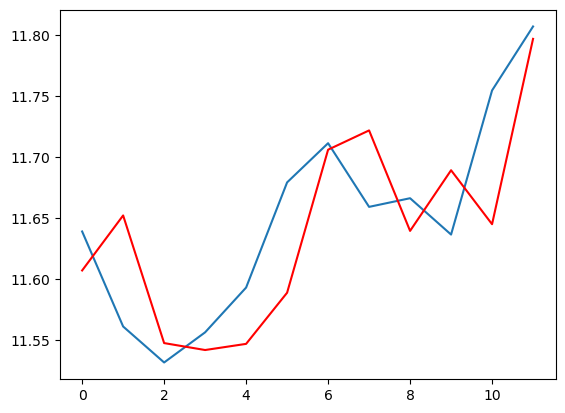

In [135]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
pyplot.plot(CloseTest)
pyplot.plot(PredTest, color='red')
pyplot.show()


In [136]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - SUMMARY
#===============================================================================================================================
print(SARIMA_ROLL_model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  287
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 315.438
Date:                            Sun, 26 May 2024   AIC                           -624.877
Time:                                    23:50:18   BIC                           -614.037
Sample:                                         0   HQIC                          -620.526
                                            - 287                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1226      0.060      2.045      0.041       0.005       0.240
ma.S.L12      -0.9893      0.423   

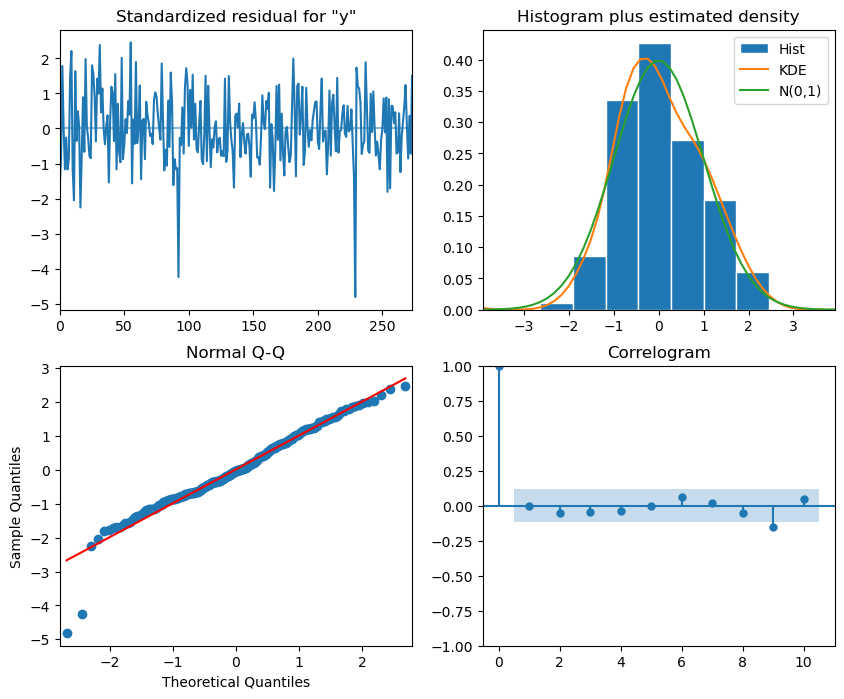

In [137]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - DIAGNOSTICS
#===============================================================================================================================
SARIMA_ROLL_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: Only one significant Coefficients after lag 0, at lag 9 => close to White Noise.
#
# ***** ~ WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [138]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
#residuals = model_fit.resid
residuals = SARIMA_ROLL_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11   0.335199        1.0 (12)
#-------------------------------------------------------------------------------------------------------------------------------
# LJUNG-BOX test: pvalue > 0.05 => Residuals NOT CORRELATED.
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => Model can be used to FORECAST *****
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
11,0.335199,1.0


In [139]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - RESULTS
#===============================================================================================================================
#dfln.rename(columns={"pred_SARIMAS_ROLLLn": "pred_SARIMARLn"}, inplace=True)
dfln.loc[testini:,'pred_SARIMARLn'].to_excel('Data/Output/Rolling-Ln-Monthly-SARIMARLn(0,1,1)(0,1,1,12).xlsx')
dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn,pred_ARMALn,pred_ARIMALn,pred_SARIMALn,pred_SARIMASLn,pred_ARIMARLn,pred_SARIMARLn
275,2022-12-29,109734.60,11.605820,-0.024764,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
276,2023-01-31,113430.54,11.638946,0.033126,11.605820,10.732902,11.610645,11.602919,11.606656,11.607800,11.607800,11.606992,11.603219,11.606992
277,2023-02-28,104931.93,11.561067,-0.077879,11.638946,10.736173,11.648063,11.642805,11.646236,11.614927,11.614927,11.616259,11.643639,11.652086
278,2023-03-31,101882.20,11.531573,-0.029495,11.561067,10.739140,11.567604,11.552141,11.559829,11.612224,11.612224,11.614094,11.550425,11.547467
279,2023-04-28,104431.63,11.556288,0.024715,11.531573,10.741981,11.520429,11.528159,11.522971,11.605360,11.605360,11.626270,11.529131,11.541779
280,2023-05-31,108335.07,11.592984,0.036696,11.556288,10.744889,11.553166,11.559134,11.555436,11.606960,11.606960,11.614935,11.559821,11.546821
281,2023-06-30,118087.00,11.679177,0.086193,11.592984,10.747907,11.592800,11.597231,11.609757,11.613442,11.613442,11.604865,11.597320,11.588753
282,2023-07-31,121942.98,11.711309,0.032132,11.679177,10.751209,11.691326,11.689332,11.694393,11.612803,11.612803,11.619887,11.690028,11.705977
283,2023-08-31,115741.81,11.659117,-0.052192,11.711309,10.754602,11.718385,11.715136,11.723202,11.606793,11.606793,11.629768,11.714145,11.721784
284,2023-09-29,116565.17,11.666206,0.007089,11.659117,10.757787,11.641320,11.652965,11.645983,11.606612,11.606612,11.618086,11.651774,11.639426


In [140]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])
#mse_ARIMA      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn' ])
#mse_SARIMA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'])
#mse_SARIMAS    = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn'])
mse_ARIMAR      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMARLn'])
mse_SARIMAR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMARLn'])

data_metrics = [['Last'       , "{:,}".format(round(mse_Last       ,6)), "{:,}".format(round(sqrt(mse_Last)       ,6))] ,
                ['Mean'       , "{:,}".format(round(mse_Mean       ,6)), "{:,}".format(round(sqrt(mse_Mean)       ,6))] ,
                ['MA'         , "{:,}".format(round(mse_MA         ,6)), "{:,}".format(round(sqrt(mse_MA)         ,6))] ,
                ['AR'         , "{:,}".format(round(mse_AR         ,6)), "{:,}".format(round(sqrt(mse_AR)         ,6))] ,
                ['ARMA'       , "{:,}".format(round(mse_ARMA       ,6)), "{:,}".format(round(sqrt(mse_ARMA)       ,6))] ,
                ['ARIMA'      , "{:,}".format(round(mse_ARIMA      ,6)), "{:,}".format(round(sqrt(mse_ARIMA)      ,6))] ,
                ['SARIMA'     , "{:,}".format(round(mse_SARIMA     ,6)), "{:,}".format(round(sqrt(mse_SARIMA)     ,6))] ,
                ['SARIMAS'    , "{:,}".format(round(mse_SARIMAS    ,6)), "{:,}".format(round(sqrt(mse_SARIMAS)    ,6))] ,
                ['ARIMAR'     , "{:,}".format(round(mse_ARIMAR     ,6)), "{:,}".format(round(sqrt(mse_ARIMAR)     ,6))] ,
                ['SARIMAR'    , "{:,}".format(round(mse_SARIMAR    ,6)), "{:,}".format(round(sqrt(mse_SARIMAR)    ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#---------------------------------
#    Log           MSE      RMSE
#---------------------------------
# 0  Last     0.003235  0.056875
# 1  Mean     0.814346  0.902411
# 2  MA       0.003198  0.056547
# 3  AR       0.003174  0.056342
# 4  ARMA     0.002991  0.054687
# 5  ARIMA    0.007792  0.088273
# 6  SARIMA   0.007792  0.088273
# 7  SARIMAS  0.005162  0.071848
# 8  ARIMAR   0.003166  0.056265
# 9  SARIMAR  0.003304  0.057483
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.003235,0.056875
1,Mean,0.814346,0.902411
2,MA,0.003198,0.056547
3,AR,0.003174,0.056342
4,ARMA,0.002991,0.054687
5,ARIMA,0.007792,0.088273
6,SARIMA,0.007792,0.088273
7,SARIMAS,0.004947,0.070332
8,ARIMAR,0.003166,0.056265
9,SARIMAR,0.003304,0.057483


C:\Users\55119\AppData\Local\Temp\ipykernel_11724\2039437400.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(testini, totallen-testlen)


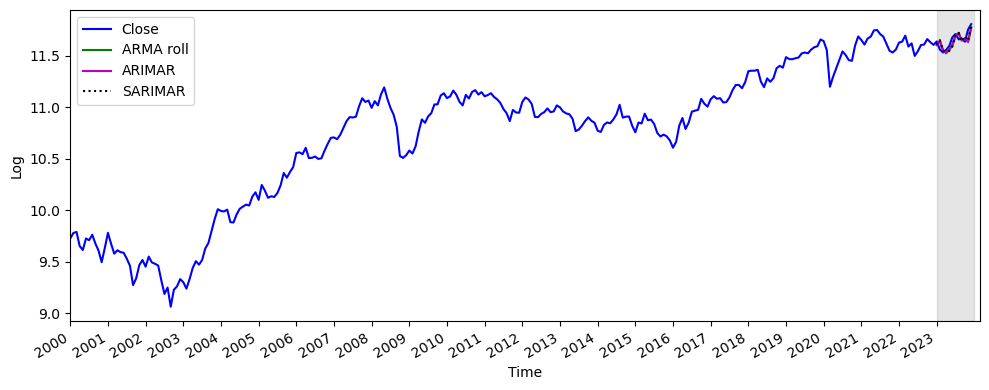

In [141]:
#===============================================================================================================================
# ROLLING SARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[:,'CloseLn']                       , 'b-', label='Close')    
#ax.plot(dfln.loc[testini:,'pred_LastLn']       , 'r:', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']        , 'g-', label='ARMA roll')   
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'm-', label='ARIMAR')   
ax.plot(dfln.loc[testini:,'pred_SARIMARLn'], 'k:', label='SARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen-testlen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

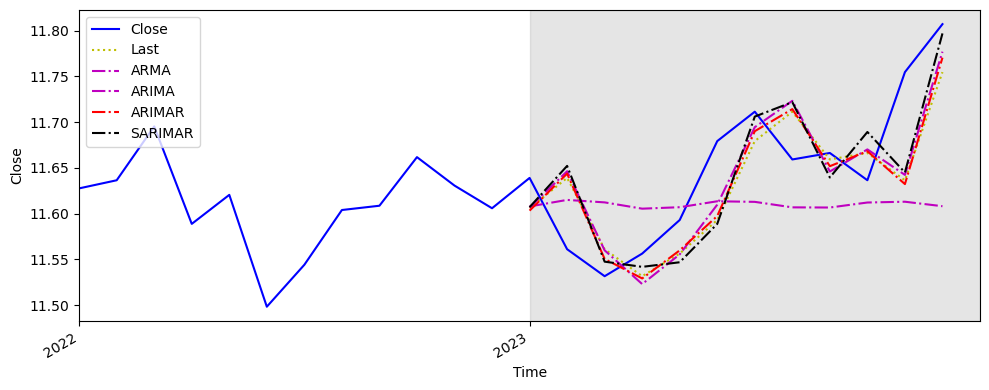

In [142]:
#===============================================================================================================================
# ROLLING SARIMA SEASONAL: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen: ,'CloseLn']        , 'b-',  label='Close')    
ax.plot(dfln.loc[testini:         ,'pred_LastLn']    , 'y:',  label='Last')    
ax.plot(dfln.loc[testini:         ,'pred_ARMALn']    , 'm-.', label='ARMA')   
ax.plot(dfln.loc[testini:         ,'pred_ARIMALn']   , 'm-.', label='ARIMA')   
ax.plot(dfln.loc[testini:         ,'pred_ARIMARLn']  , 'r-.', label='ARIMAR')   
ax.plot(dfln.loc[testini:         ,'pred_SARIMARLn'] , 'k-.', label='SARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen) 
plt.xticks([ testini-testlen, testini ], [ 2022           , 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [143]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - RECOVER
#===============================================================================================================================
df['pred_SARIMAR'] = 0.0
df.loc[testini:,'pred_SARIMAR']= np.round(np.exp(dfln.loc[testini:,'pred_SARIMARLn']),2)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR,pred_ARMA,pred_ARIMAR,pred_SARIMAR
275,2022-12-29,109734.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
276,2023-01-31,113430.54,109734.60,55666.44,110265.40,109416.77,109826.35,109449.53,109863.25
277,2023-02-28,104931.93,113430.54,55874.98,114469.41,113869.16,114260.51,113964.14,114930.91
278,2023-03-31,101882.20,104931.93,56051.44,105620.11,103999.42,104802.10,103821.17,103514.46
279,2023-04-28,104431.63,101882.20,56215.71,100753.16,101535.02,101009.61,101633.74,102927.40
280,2023-05-31,108335.07,104431.63,56387.91,104106.16,104729.28,104342.70,104801.29,103447.70
281,2023-06-30,118087.00,108335.07,56572.78,108315.10,108796.16,110167.46,108805.84,107877.61
282,2023-07-31,121942.98,118087.00,56790.91,119530.44,119292.29,119897.53,119375.40,121294.58
283,2023-08-31,115741.81,121942.98,57021.13,122808.97,122410.63,123401.96,122289.35,123227.02
284,2023-09-29,116565.17,115741.81,57227.89,113700.10,115031.89,114231.53,114895.02,113485.06


In [144]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])
mse_ARMA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'])
mse_ARIMAR = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARIMAR'])
mse_SARIMAR= mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMAR'])

data_metrics = [['Last'      , "{:,}".format(round(mse_Last,))   , "{:,}".format(round(sqrt(mse_Last)   ,))] ,
                ['Mean'      , "{:,}".format(round(mse_Mean,))   , "{:,}".format(round(sqrt(mse_Mean)   ,))] ,
                ['MA'        , "{:,}".format(round(mse_MA,  ))   , "{:,}".format(round(sqrt(mse_MA)     ,))] ,
                ['AR'        , "{:,}".format(round(mse_AR,  ))   , "{:,}".format(round(sqrt(mse_AR)     ,))] ,
                ['ARMA'      , "{:,}".format(round(mse_ARMA,))   , "{:,}".format(round(sqrt(mse_ARMA)   ,))] ,
                ['ARIMA'     , "{:,}".format(round(mse_ARIMA,))  , "{:,}".format(round(sqrt(mse_ARIMA)  ,))] ,
                ['ARIMAR'    , "{:,}".format(round(mse_ARIMAR,)) , "{:,}".format(round(sqrt(mse_ARIMAR) ,))] ,
                ['SARIMAR'   , "{:,}".format(round(mse_SARIMAR,)), "{:,}".format(round(sqrt(mse_SARIMAR),))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price           MSE   RMSE
#---------------------------------
# 0  Last     43,832,846  6,621
# 1  Mean  3,470,811,963 58,914
# 2  MA       42,313,143  6,505
# 3  AR       42,768,145  6,540
# 4  ARMA     40,083,807  6,331
# 5  ARIMA             0      0
# 6  ARIMAR   42,619,672  6,528
# 7  SARIMAR  43,821,584  6,620
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,"43,832,846","6,621"
1,Mean,"3,470,811,963","58,914"
2,MA,"42,313,143","6,505"
3,AR,"42,768,145","6,540"
4,ARMA,"40,083,807","6,331"
5,ARIMA,0,0
6,ARIMAR,"42,619,672","6,528"
7,SARIMAR,"43,821,584","6,620"


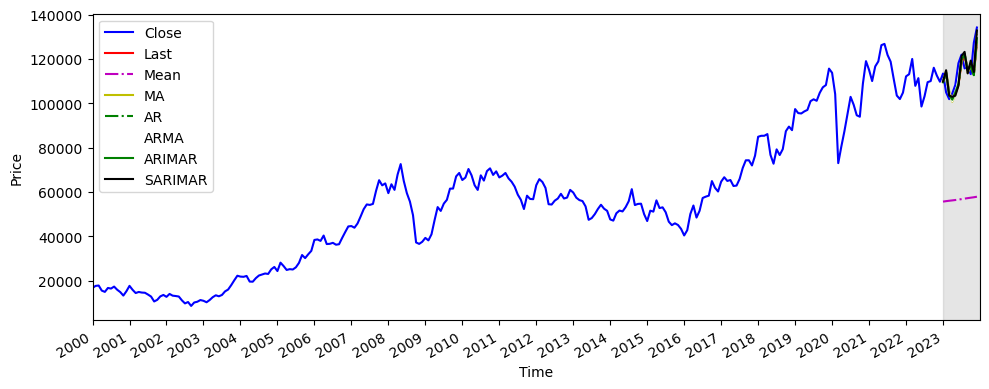

In [145]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini:,'pred_Last']     , 'r-' , label='Last'    )
ax.plot(df.loc[testini:,'pred_Mean']     , 'm-.', label='Mean'    )
ax.plot(df.loc[testini:,'pred_MA']       , 'y-' , label='MA'      )   
ax.plot(df.loc[testini:,'pred_AR']       , 'g-.', label='AR'      )   
ax.plot(df.loc[testini:,'pred_ARMA']     , 'w-' , label='ARMA'    )   
ax.plot(df.loc[testini:,'pred_ARIMAR']   , 'g-' , label='ARIMAR'  )   
ax.plot(df.loc[testini:,'pred_SARIMAR']  , 'k-' , label='SARIMAR' )   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

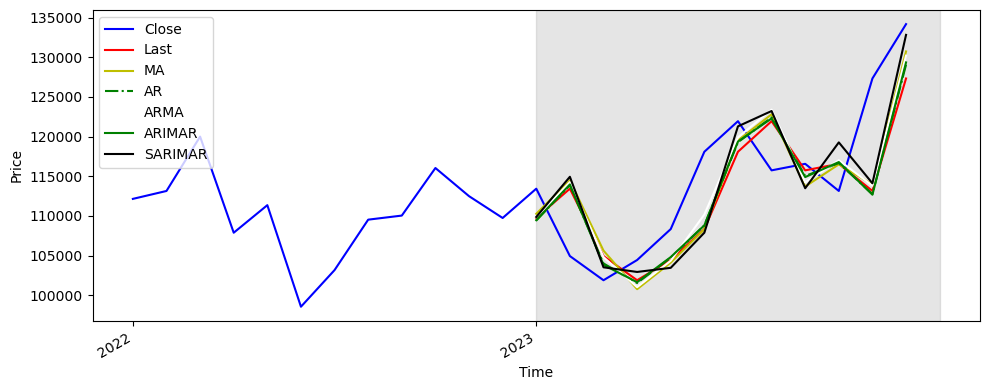

In [146]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close'] , 'b-' , label='Close')    
ax.plot(df.loc[testini:,'pred_Last']     , 'r-' , label='Last')
#ax.plot(df.loc[testini:,'pred_Mean']     , 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']       , 'y-' , label='MA')   
ax.plot(df.loc[testini:,'pred_AR']       , 'g-.', label='AR')   
ax.plot(df.loc[testini:,'pred_ARMA']     , 'w-' , label='ARMA')   
ax.plot(df.loc[testini:,'pred_ARIMAR']   , 'g-' , label='ARIMAR')   
ax.plot(df.loc[testini:,'pred_SARIMAR']  , 'k-' , label='SARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()

